# Data Description

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

pd.options.display.float_format = '{:.2f}'.format

print('LOAD DURATION: ', dt.datetime.now() - start_time)

LOAD DURATION:  0:00:00.000098


In [2]:
%%time
data = pd.read_csv('NY property data.csv')

CPU times: user 3.78 s, sys: 1.21 s, total: 4.99 s
Wall time: 5.25 s


In [3]:
data.shape

(1070994, 32)

In [4]:
data.head(50).to_excel('data_small.xlsx',index=None)

In [5]:
data.dtypes

RECORD        int64
BBLE         object
BORO          int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [6]:
data.head().transpose()

,0,1,2,3,4
RECORD,1,2,3,4,5
BBLE,1000010101,1000010201,1000020001,1000020023,1000030001
BORO,1,1,1,1,1
BLOCK,1,1,2,2,3
LOT,101,201,1,23,1
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,U S GOVT LAND & BLDGS,U S GOVT LAND & BLDGS,DEPT OF GENERAL SERVI,DEPARTMENT OF BUSINES,PARKS AND RECREATION
BLDGCL,P7,Z9,Y7,T2,Q1
TAXCLASS,4,4,4,4,4
LTFRONT,500,27,709,793,323


In [7]:
data.tail().transpose()

,1070989,1070990,1070991,1070992,1070993
RECORD,1070990,1070991,1070992,1070993,1070994
BBLE,5080500083,5080500086,5080500089,5080500092,5080500094
BORO,5,5,5,5,5
BLOCK,8050,8050,8050,8050,8050
LOT,83,86,89,92,94
EASEMENT,NaN,NaN,NaN,NaN,NaN
OWNER,"TOBIN, GALE",SHERRI MILINAZZO,JOHN GERVASI,RITA M MOOG,EDWARD DONOHUE
BLDGCL,A1,A1,A1,A1,A1
TAXCLASS,1,1,1,1,1
LTFRONT,60,62,53,52,50


In [8]:
data.count()

RECORD      1070994
BBLE        1070994
BORO        1070994
BLOCK       1070994
LOT         1070994
EASEMENT       4636
OWNER       1039249
BLDGCL      1070994
TAXCLASS    1070994
LTFRONT     1070994
LTDEPTH     1070994
EXT          354305
STORIES     1014730
FULLVAL     1070994
AVLAND      1070994
AVTOT       1070994
EXLAND      1070994
EXTOT       1070994
EXCD1        638488
STADDR      1070318
ZIP         1041104
EXMPTCL       15579
BLDFRONT    1070994
BLDDEPTH    1070994
AVLAND2      282726
AVTOT2       282732
EXLAND2       87449
EXTOT2       130828
EXCD2         92948
PERIOD      1070994
YEAR        1070994
VALTYPE     1070994
dtype: int64

In [9]:
data.isna().sum()

RECORD            0
BBLE              0
BORO              0
BLOCK             0
LOT               0
EASEMENT    1066358
OWNER         31745
BLDGCL            0
TAXCLASS          0
LTFRONT           0
LTDEPTH           0
EXT          716689
STORIES       56264
FULLVAL           0
AVLAND            0
AVTOT             0
EXLAND            0
EXTOT             0
EXCD1        432506
STADDR          676
ZIP           29890
EXMPTCL     1055415
BLDFRONT          0
BLDDEPTH          0
AVLAND2      788268
AVTOT2       788262
EXLAND2      983545
EXTOT2       940166
EXCD2        978046
PERIOD            0
YEAR              0
VALTYPE           0
dtype: int64

In [10]:
populated = 1 - data.isna().sum()/len(data)
populated.round(4)

RECORD     1.00
BBLE       1.00
BORO       1.00
BLOCK      1.00
LOT        1.00
EASEMENT   0.00
OWNER      0.97
BLDGCL     1.00
TAXCLASS   1.00
LTFRONT    1.00
LTDEPTH    1.00
EXT        0.33
STORIES    0.95
FULLVAL    1.00
AVLAND     1.00
AVTOT      1.00
EXLAND     1.00
EXTOT      1.00
EXCD1      0.60
STADDR     1.00
ZIP        0.97
EXMPTCL    0.01
BLDFRONT   1.00
BLDDEPTH   1.00
AVLAND2    0.26
AVTOT2     0.26
EXLAND2    0.08
EXTOT2     0.12
EXCD2      0.09
PERIOD     1.00
YEAR       1.00
VALTYPE    1.00
dtype: float64

In [11]:
numrecords = len(data)

In [12]:
data.describe(include = 'all')

,RECORD,BBLE,BORO,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
count,1070994.00,1070994,1070994.00,1070994.00,1070994.00,4636,1039249,1070994,1070994,1070994.00,...,1070994.00,1070994.00,282726.00,282732.00,87449.00,130828.00,92948.00,1070994,1070994,1070994
unique,NaN,1070994,NaN,NaN,NaN,12,863347,200,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
top,NaN,1000010101,NaN,NaN,NaN,E,PARKCHESTER PRESERVAT,R4,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
freq,NaN,1,NaN,NaN,NaN,4148,6021,139879,660721,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1070994,1070994,1070994
mean,535497.50,NaN,3.22,4757.24,364.72,NaN,NaN,NaN,NaN,36.64,...,23.04,39.92,246235.72,713911.44,351235.68,656768.28,1364.04,NaN,NaN,NaN
std,309169.48,NaN,1.20,3676.58,853.22,NaN,NaN,NaN,NaN,74.03,...,35.58,42.71,6178962.56,11652528.95,10802212.67,16072510.17,1094.71,NaN,NaN,NaN
min,1.00,NaN,1.00,1.00,1.00,NaN,NaN,NaN,NaN,0.00,...,0.00,0.00,3.00,3.00,1.00,7.00,1011.00,NaN,NaN,NaN
25%,267749.25,NaN,3.00,1555.00,23.00,NaN,NaN,NaN,NaN,19.00,...,15.00,26.00,5705.00,33912.00,2090.00,2870.00,1017.00,NaN,NaN,NaN
50%,535497.50,NaN,3.00,4047.00,49.00,NaN,NaN,NaN,NaN,25.00,...,20.00,39.00,20145.00,79962.50,3048.00,37062.00,1017.00,NaN,NaN,NaN
75%,803245.75,NaN,4.00,6898.00,143.00,NaN,NaN,NaN,NaN,40.00,...,24.00,50.00,62640.00,240551.00,31779.00,106840.75,1017.00,NaN,NaN,NaN


In [13]:
# add a dummy categorical column for the case the fields all look numeric
data['dummy'] = 'temp'

In [14]:
df_stats = pd.DataFrame(data.count(),columns=['count'])
df_stats['isna'] = data.isna().sum()
df_stats['% pop'] = 1 - data.isna().sum()/len(data)
df_stats

,count,isna,% pop
RECORD,1070994,0,1.00
BBLE,1070994,0,1.00
BORO,1070994,0,1.00
BLOCK,1070994,0,1.00
LOT,1070994,0,1.00
EASEMENT,4636,1066358,0.00
OWNER,1039249,31745,0.97
BLDGCL,1070994,0,1.00
TAXCLASS,1070994,0,1.00
LTFRONT,1070994,0,1.00


In [15]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RECORD,1070994.00,NaN,NaN,NaN,535497.50,309169.48,1.00,267749.25,535497.50,803245.75,1070994.00
BBLE,1070994,1070994,1000010101,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BORO,1070994.00,NaN,NaN,NaN,3.22,1.20,1.00,3.00,3.00,4.00,5.00
BLOCK,1070994.00,NaN,NaN,NaN,4757.24,3676.58,1.00,1555.00,4047.00,6898.00,16350.00
LOT,1070994.00,NaN,NaN,NaN,364.72,853.22,1.00,23.00,49.00,143.00,9978.00
EASEMENT,4636,12,E,4148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OWNER,1039249,863347,PARKCHESTER PRESERVAT,6021,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLDGCL,1070994,200,R4,139879,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAXCLASS,1070994,11,1,660721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LTFRONT,1070994.00,NaN,NaN,NaN,36.64,74.03,0.00,19.00,25.00,40.00,9999.00


### Make best guess to automatically set numerics or categoricals

In [16]:
df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # you can adjust this upper limit for your data set
            print(col)
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch fields some if desired.          
switch_num2cat = ['BLOCK','LOT','EXCD1','ZIP','EXCD2']
switch_cat2num = []
numerics = [s for s in numerics if s not in switch_num2cat]
categoricals = [s for s in categoricals if s not in switch_cat2num]
numerics.extend(switch_cat2num)
categoricals.extend(switch_num2cat)
categoricals.remove('dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)     

RECORD
BBLE
BORO
EXT
PERIOD
YEAR
VALTYPE
dummy
numerics: ['LTFRONT', 'LTDEPTH', 'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'EXLAND', 'EXTOT', 'BLDFRONT', 'BLDDEPTH', 'AVLAND2', 'AVTOT2', 'EXLAND2', 'EXTOT2']

categoricals: ['BBLE', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 'STADDR', 'EXMPTCL', 'PERIOD', 'YEAR', 'VALTYPE', 'RECORD', 'BORO', 'BLOCK', 'LOT', 'EXCD1', 'ZIP', 'EXCD2']


### the above cell gets the categorical fields out of order of the original data file. It'd be nice if someone can improve this cell and send it to me.

In [17]:
# fix the order of the categoricals

categoricals = ['RECORD','BBLE','BORO','BLOCK','LOT','EASEMENT','OWNER','BLDGCL','TAXCLASS','EXT',
            'EXCD1','STADDR','ZIP','EXMPTCL','EXCD2','PERIOD','YEAR','VALTYPE']

In [18]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [19]:
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,LTFRONT,numeric,1070994,100.0%,169108,0.00,9999.00,36.64,74.03,0.00
1,LTDEPTH,numeric,1070994,100.0%,170128,0.00,9999.00,88.86,76.40,100.00
2,STORIES,numeric,1014730,94.7%,0,1.00,119.00,5.01,8.37,2.00
3,FULLVAL,numeric,1070994,100.0%,13007,0.00,6150000000.00,874264.51,11582425.58,0.00
4,AVLAND,numeric,1070994,100.0%,13009,0.00,2668500000.00,85067.92,4057258.16,0.00
5,AVTOT,numeric,1070994,100.0%,13007,0.00,4668308947.00,227238.17,6877526.09,0.00
6,EXLAND,numeric,1070994,100.0%,491699,0.00,2668500000.00,36423.89,3981573.93,0.00
7,EXTOT,numeric,1070994,100.0%,432572,0.00,4668308947.00,91186.98,6508399.78,0.00
8,BLDFRONT,numeric,1070994,100.0%,228815,0.00,7575.00,23.04,35.58,0.00
9,BLDDEPTH,numeric,1070994,100.0%,228853,0.00,9393.00,39.92,42.71,0.00


In [20]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,RECORD,categorical,1070994,100.0%,0,1070994,1
1,BBLE,categorical,1070994,100.0%,0,1070994,1000010101
2,BORO,categorical,1070994,100.0%,0,5,4
3,BLOCK,categorical,1070994,100.0%,0,13984,3944
4,LOT,categorical,1070994,100.0%,0,6366,1
5,EASEMENT,categorical,4636,0.4%,0,12,E
6,OWNER,categorical,1039249,97.0%,0,863347,PARKCHESTER PRESERVAT
7,BLDGCL,categorical,1070994,100.0%,0,200,R4
8,TAXCLASS,categorical,1070994,100.0%,0,11,1
9,EXT,categorical,354305,33.1%,0,3,G


# Visualization

## RECORD

In [21]:
plt.rcParams.update({'figure.figsize':(14,6)})
plt.rcParams.update({'font.size':20})
# plt.rcParams['font.family'] = 'Times New Roman'

In [22]:
len(data['RECORD'].unique())

1070994

In [23]:
len(data['RECORD'])

1070994

<Axes: xlabel='RECORD'>

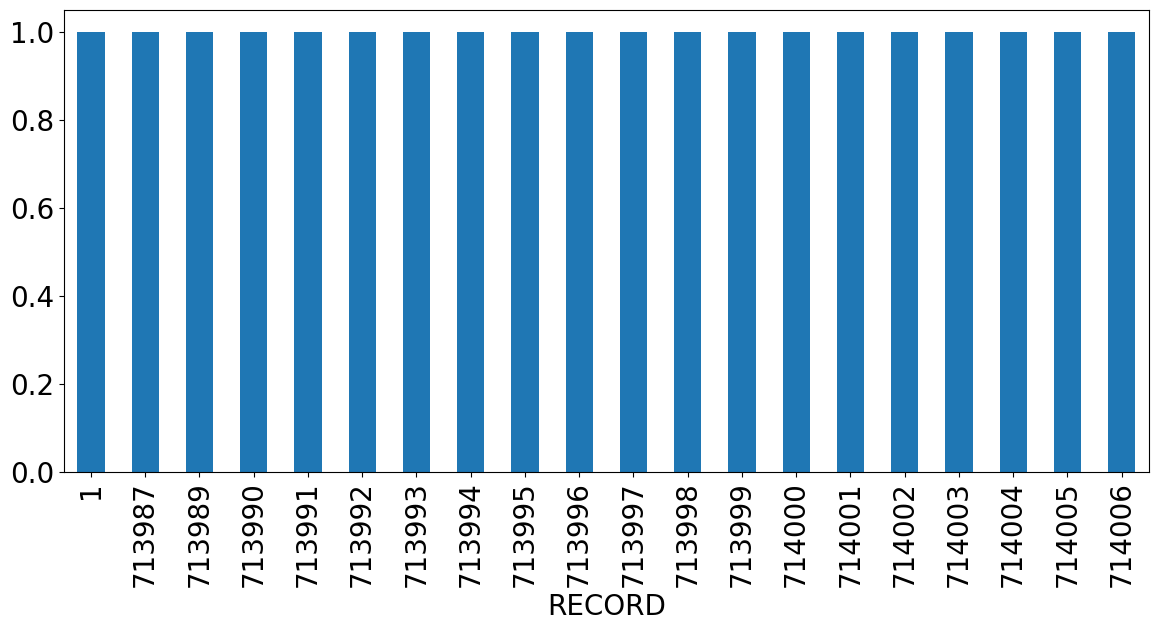

In [24]:
data['RECORD'].value_counts().head(20).plot(kind='bar')

## BBLE

In [25]:
len(data['BBLE'])

1070994

In [26]:
len(data['BBLE'].unique())

1070994

<Axes: xlabel='BBLE'>

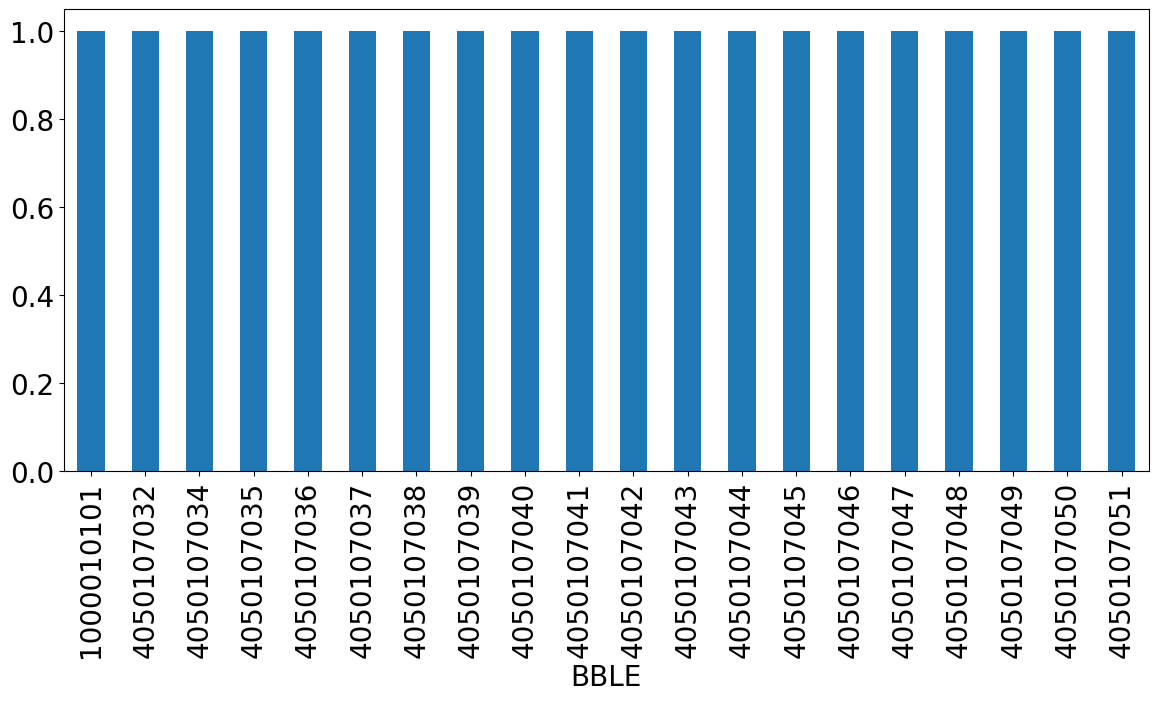

In [27]:
data['BBLE'].value_counts().head(20).plot(kind='bar')

## BORO

In [28]:
len(data['BORO'].unique())

5

In [29]:
data['BORO'].count() * 100 / numrecords

100.0

In [30]:
data['BORO'].value_counts()

BORO
4    358046
3    323243
1    146220
5    136200
2    107285
Name: count, dtype: int64

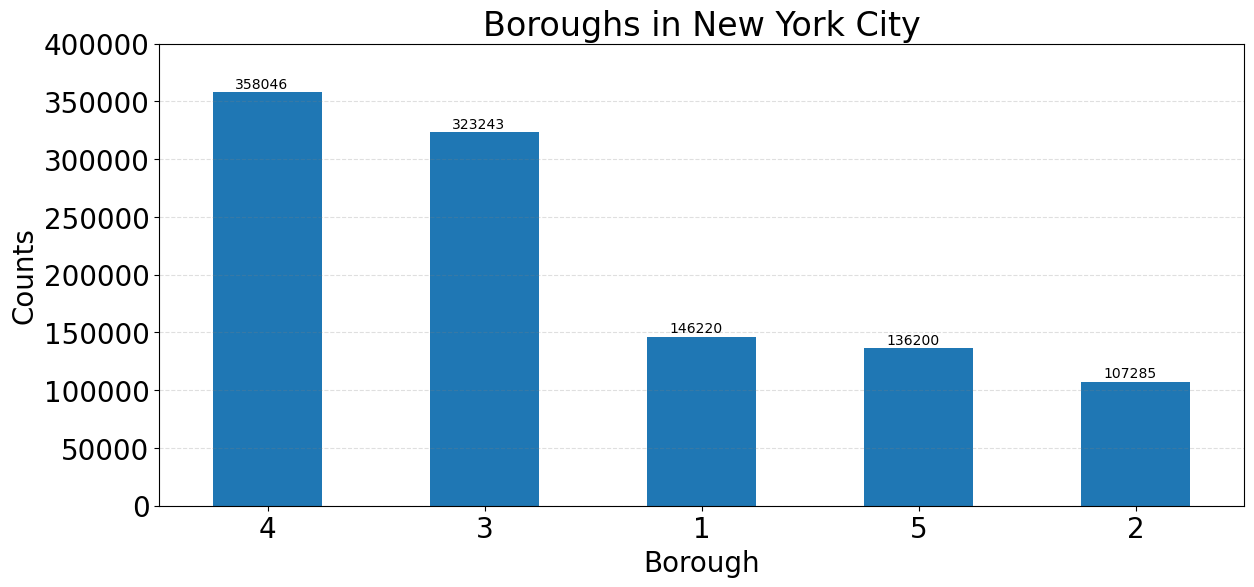

In [31]:
# Generate the bar plot
counts = data['BORO'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylim(0,400000)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=10)

plt.title('Boroughs in New York City')
plt.xlabel('Borough')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('BORO')

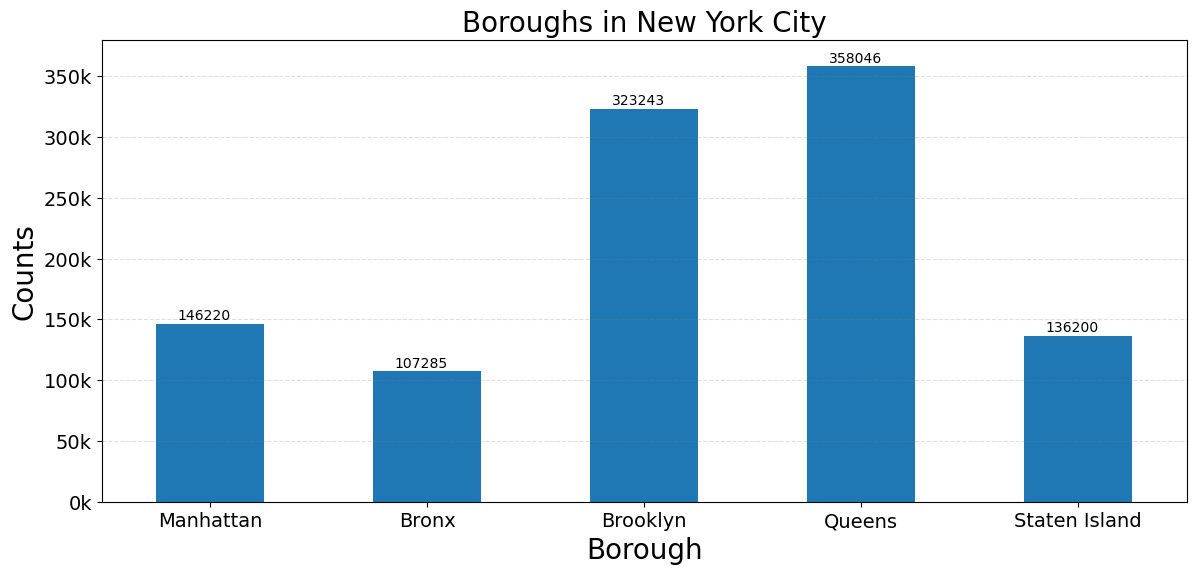

In [32]:
counts = data['BORO'].value_counts().sort_index()  # Ensure sorting by borough index
ax = counts.plot(kind='bar')
plt.xticks(ticks=np.arange(5), labels=['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'], rotation=0)  # Set custom labels
plt.ylim(0, 380000)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=10)
    
plt.title('Boroughs in New York City', fontsize=20)
plt.xlabel('Borough',fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=0.25)

#set the word size of the x, y axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Simplify the y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x/1000:.0f}k"))
# Simplify the y-axis
ax.yaxis.set_major_locator(plt.MaxNLocator(8))  # Limit the number of y-ticks to make the axis less crowded
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=0.25)


plt.savefig('BORO')

## BLOCK

In [33]:
len(data['BLOCK'].unique())

13984

In [34]:
data['BLOCK'].count() * 100 / numrecords

100.0

In [35]:
data['BLOCK'].value_counts()

BLOCK
3944     3888
16       3786
3943     3424
3938     2794
1171     2535
         ... 
9682        1
12325       1
10154       1
16129       1
2052        1
Name: count, Length: 13984, dtype: int64

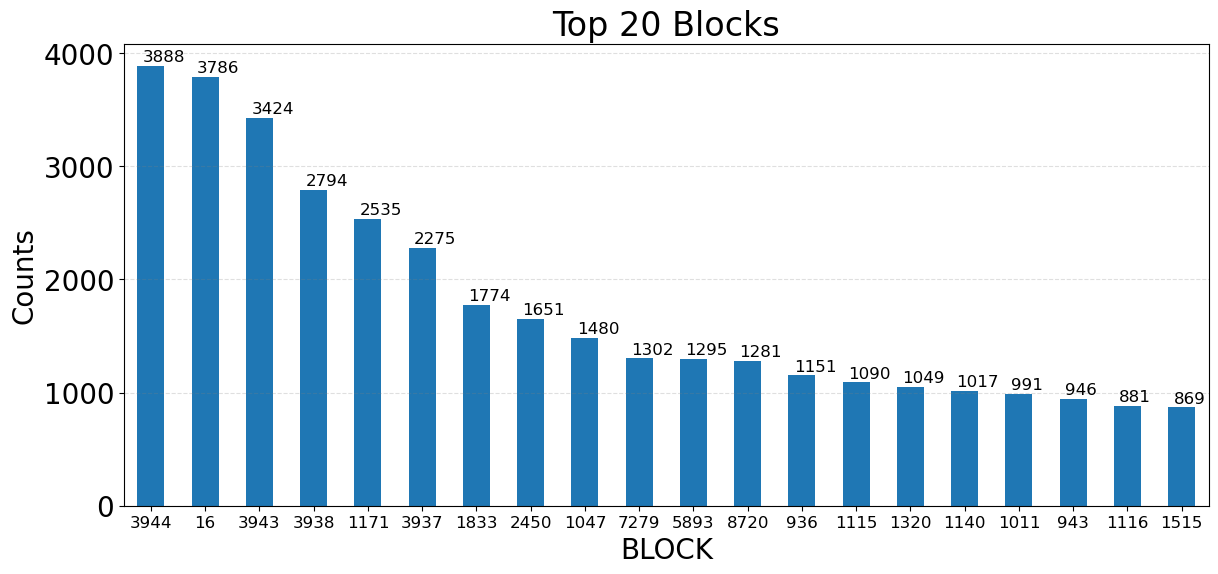

In [36]:
counts = data['BLOCK'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.tick_params(axis='x', labelsize=12)

# Add number labels to each column
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black',  fontsize=12)

# Set titles for the graph and axes
plt.title('Top 20 Blocks')
plt.ylabel('Counts')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('BLOCK')

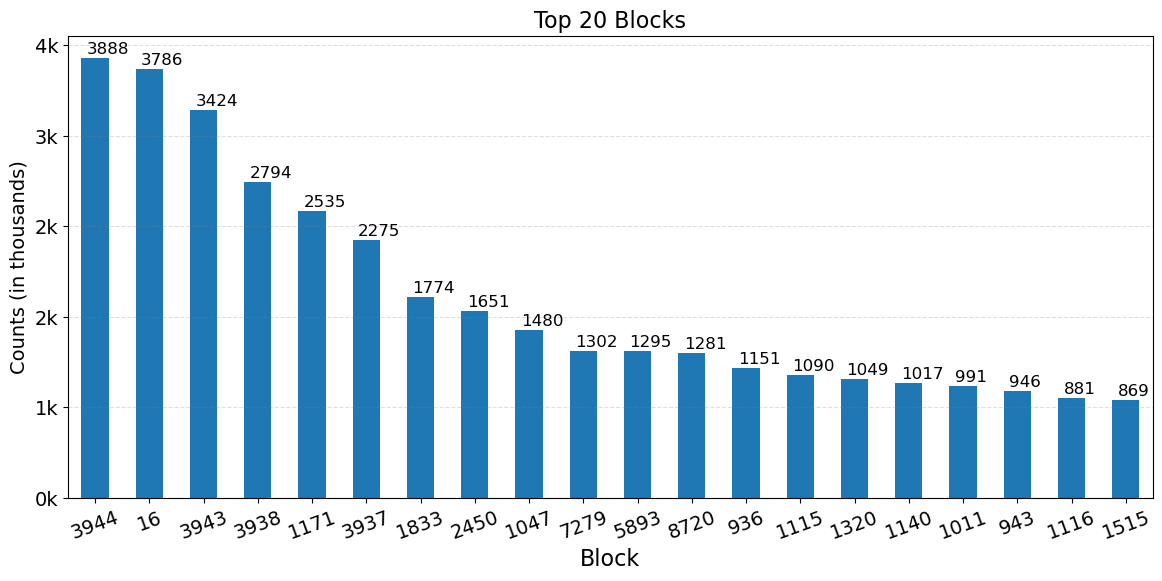

In [37]:
counts = data['BLOCK'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.tick_params(axis='x', labelsize=12)

# Add number labels to each column with the full count
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=12)

# Set titles for the graph and axes
plt.title('Top 20 Blocks', fontsize=16)
plt.xlabel('Block', fontsize=16)
plt.ylabel('Counts (in thousands)', fontsize=14)
plt.xticks(fontsize=14, rotation=20)
plt.yticks(fontsize=14)

# Convert y-axis ticks to 'k' notation while keeping individual labels in full count
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x/1000:.0f}k"))

# Simplify the y-axis
ax.yaxis.set_major_locator(plt.MaxNLocator(6))  # Limit the number of y-ticks to make the axis less crowded
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=0.25)

plt.savefig('BLOCK')

## LOT

In [38]:
len(data['LOT'].unique())

6366

In [39]:
data['LOT'].count() * 100 / numrecords

100.0

In [40]:
data['LOT'].value_counts()

LOT
1       24367
20      12294
15      12171
12      12143
14      12074
        ...  
6115        1
6116        1
6117        1
6118        1
779         1
Name: count, Length: 6366, dtype: int64

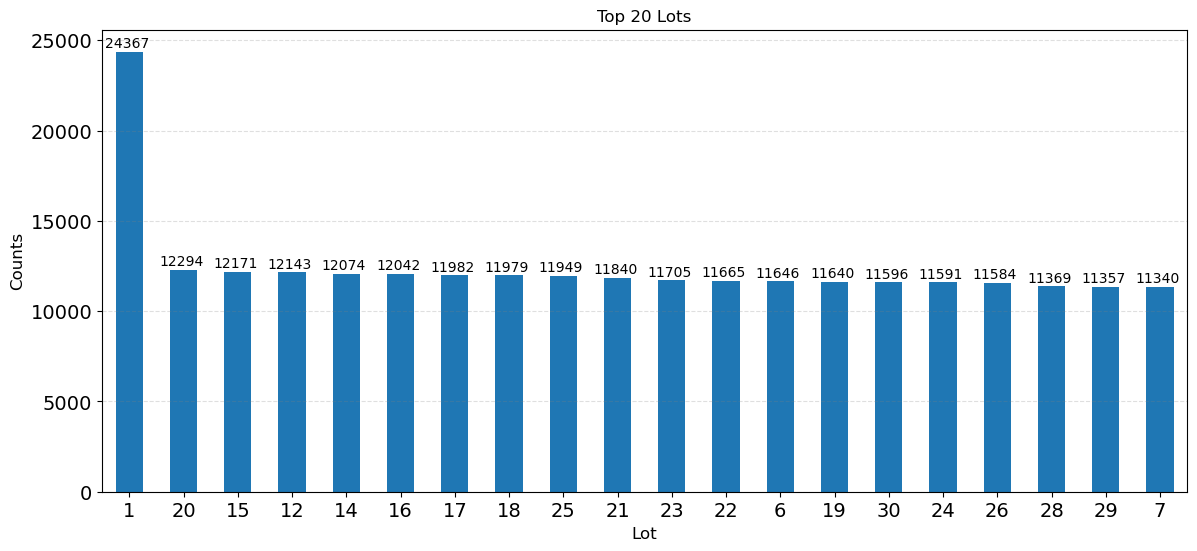

In [41]:
# Generate the bar plot
counts = data['LOT'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)

# Add number labels to each column, shifted to the left
for i, v in enumerate(counts):
    ax.text(i - 0.45, v + counts.max()*0.01, str(v), color='black', fontsize=10)

# Set titles for the graph and axes
plt.title('Top 20 Lots', fontsize=12)
plt.xlabel('Lot', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)


# Save the plot
plt.savefig('LOT')

In [42]:
data['LOT'].max()

9978

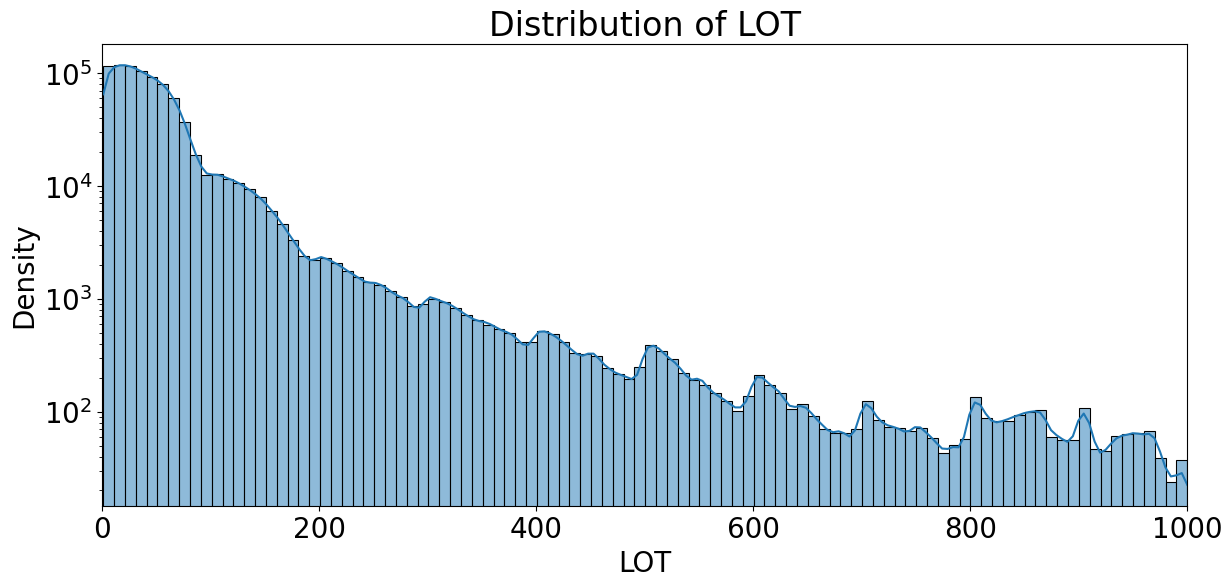

In [43]:
# look at the most relevant range
xhigh = 1000
plt.xlim(0, xhigh)
temp = data[data['LOT'] <= xhigh]
sns.histplot(temp['LOT'],bins = 100, kde = True)

plt.yscale('log')
plt.xlabel('LOT')
plt.ylabel('Density')
plt.title('Distribution of LOT')
plt.show()

# plt.savefig('LOT')

## EASEMENT

In [44]:
len(data['EASEMENT'].unique())

13

In [45]:
data['EASEMENT'].count() * 100 / numrecords

0.4328689049611856

In [46]:
data['EASEMENT'].value_counts()

EASEMENT
E    4148
F     296
G     102
H      33
N      19
I      16
J       8
K       5
L       3
P       3
M       2
U       1
Name: count, dtype: int64

/tmp/ipykernel_4986/3323971270.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,10000)


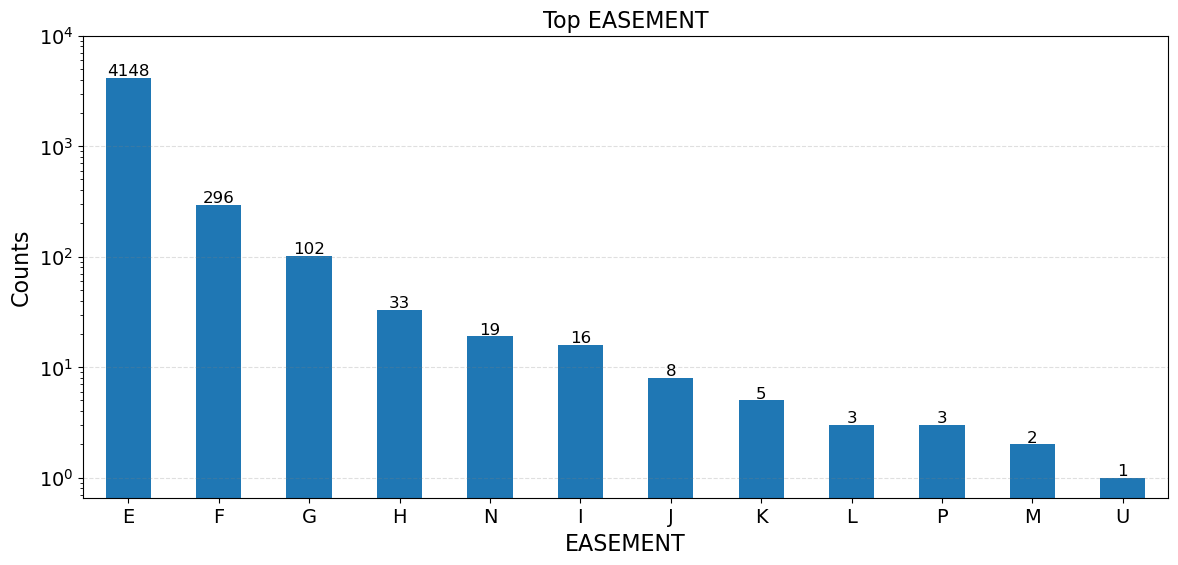

In [47]:
plt.yscale('log')
# Generate the bar plot
counts = data['EASEMENT'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylim(0,10000)
# Add number labels to each column, shifted to the left
for i, v in enumerate(counts):
    ax.text(i, v*1.05, str(v), color='black', ha='center', fontsize=12)

# Set titles for the graph and axes
plt.title('Top EASEMENT', fontsize=16)
plt.xlabel('EASEMENT', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)


plt.savefig('EASEMENT')

In [48]:
# counts = data['EASEMENT'].value_counts().head(20)
# ax = counts.plot(kind='bar')
# plt.xticks(rotation=0)

# # Correctly set y-scale to log and adjust the ylim accordingly
# plt.yscale('log')
# plt.ylim(bottom=1, top=10**np.ceil(np.log10(counts.max() + 1)))  # Use log ceiling of max count plus a margin

# # Add number labels to each column, adjusted for log scale
# for i, v in enumerate(counts):
#     ax.text(i, v, str(v), color='black', ha='center', fontsize=12)

# # Set titles for the graph and axes
# plt.title('Top EASEMENT', fontsize=16)
# plt.xlabel('EASEMENT', fontsize=16)
# plt.ylabel('Counts', fontsize=16)
# plt.xticks(fontsize=14, rotation=0)
# plt.yticks(fontsize=14)

# ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

# plt.savefig('EASEMENT')

## OWNER

In [49]:
len(data['OWNER'].unique())

863348

In [50]:
data['OWNER'].count() * 100 / numrecords

97.03593110699033

In [51]:
data['OWNER'].value_counts()

OWNER
PARKCHESTER PRESERVAT    6021
PARKS AND RECREATION     4255
DCAS                     2169
HOUSING PRESERVATION     1904
CITY OF NEW YORK         1450
                         ... 
ROSE, LORNA                 1
ELARIO ALTERNO              1
CHARLES,VIRGINIA            1
HAYLES, HEATHER             1
EDWARD DONOHUE              1
Name: count, Length: 863347, dtype: int64

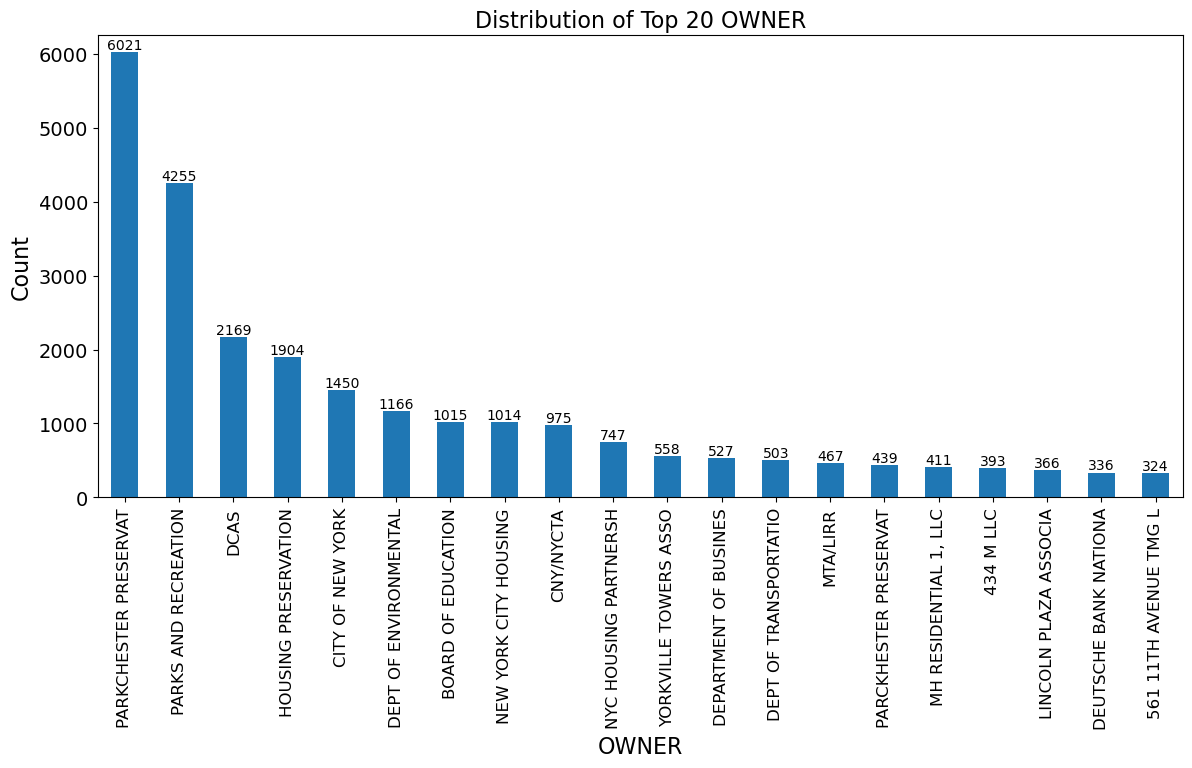

In [52]:
own = data['OWNER'].value_counts().head(20)

data['OWNER'].value_counts().head(20).plot(kind = 'bar')
# plt.yscale('log')
plt.ylim(0,6250)
plt.xticks(fontsize = 12)

j= 0
for i in own.index:    
        plt.text(j, own[i], own[i], ha = "center", va = "bottom", fontsize = 10, rotation = 0)
        j = j + 1

plt.xlabel('OWNER', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Distribution of Top 20 OWNER', fontsize = 16)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 14)


plt.savefig('OWNER')

## BLDGCL

In [53]:
len(data['BLDGCL'].unique())

200

In [54]:
data['BLDGCL'].count() * 100 / numrecords

100.0

In [55]:
data['BLDGCL'].value_counts()

BLDGCL
R4    139879
A1    123369
A5     96984
B1     84208
B2     77598
       ...  
I2         4
I3         4
H7         3
E6         1
Y5         1
Name: count, Length: 200, dtype: int64

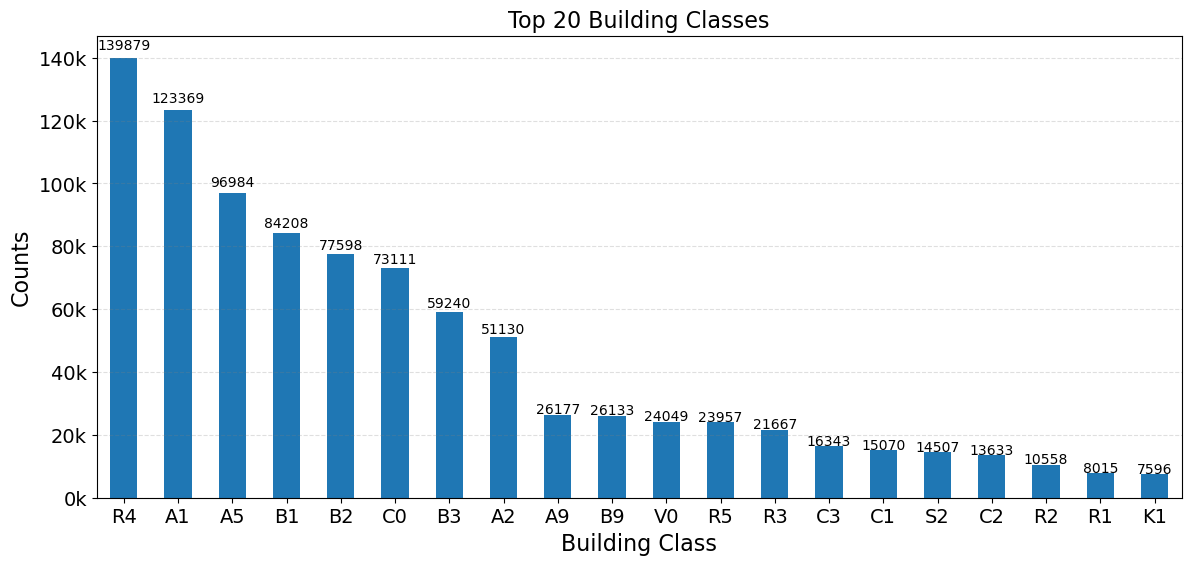

In [56]:
# Generate the bar plot
counts = data['BLDGCL'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylim(0,147000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.02, str(v), color='black', ha='center',fontsize=10)

# Set titles for the graph and axes
plt.title('Top 20 Building Classes', fontsize=16)
plt.xlabel('Building Class', fontsize=16)
plt.ylabel('Counts', rotation=90, fontsize=16)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

#set y axis to xxxk
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x/1000:.0f}k"))


plt.savefig('BLDGCL')

## TAXCLASS

In [57]:
len(data['TAXCLASS'].unique())

11

In [58]:
data['TAXCLASS'].count() * 100 / numrecords

100.0

In [59]:
data['TAXCLASS'].value_counts()

TAXCLASS
1     660721
2     188612
4     104310
2A     40574
1B     24738
1A     21667
2B     13964
2C     10795
3       4638
1C       946
1D        29
Name: count, dtype: int64

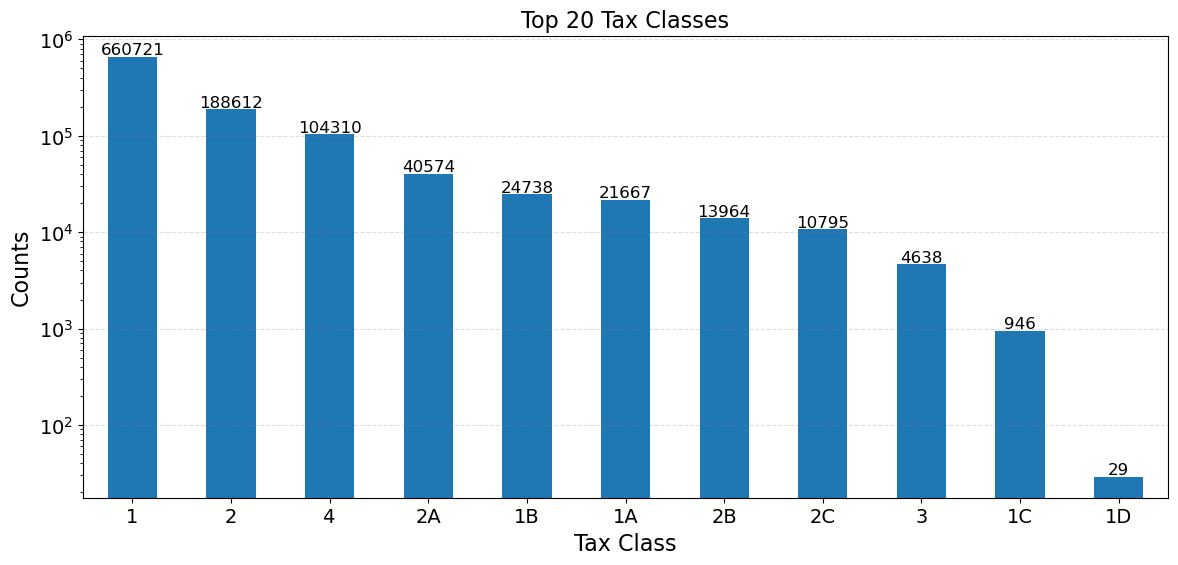

In [60]:
plt.yscale('log')

counts = data['TAXCLASS'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.05, str(v), color='black', ha='center', fontsize=12)

# Set titles for the graph and axes
plt.title('Top 20 Tax Classes', fontsize=16)
plt.xlabel('Tax Class', fontsize=16)
plt.ylabel('Counts', rotation=90, fontsize=16)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)


plt.savefig('TAXCLASS')

## LTFRONT

In [61]:
len(data['LTFRONT'].unique())

1297

In [62]:
data['LTFRONT'].count() * 100 / numrecords

100.0

In [63]:
data['LTFRONT'].value_counts()

LTFRONT
0       169108
20      135178
25      117306
40       85389
18       40668
         ...  
1320         1
1151         1
626          1
1162         1
1201         1
Name: count, Length: 1297, dtype: int64

In [64]:
data['LTFRONT'].max()

9999

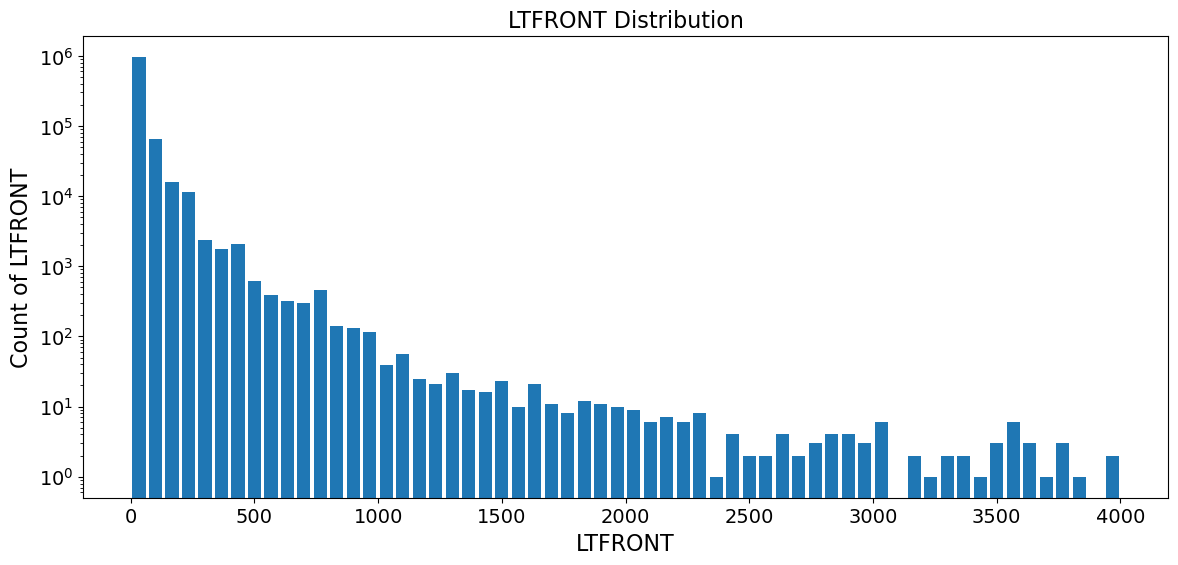

In [65]:
# plotting a histogram
range = (0, 4000)
bins = 60

plt.hist(data['LTFRONT'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('LTFRONT', fontsize = 16)
plt.ylabel('Count of LTFRONT', fontsize = 16)
plt.title('LTFRONT Distribution', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('LTFRONT')

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


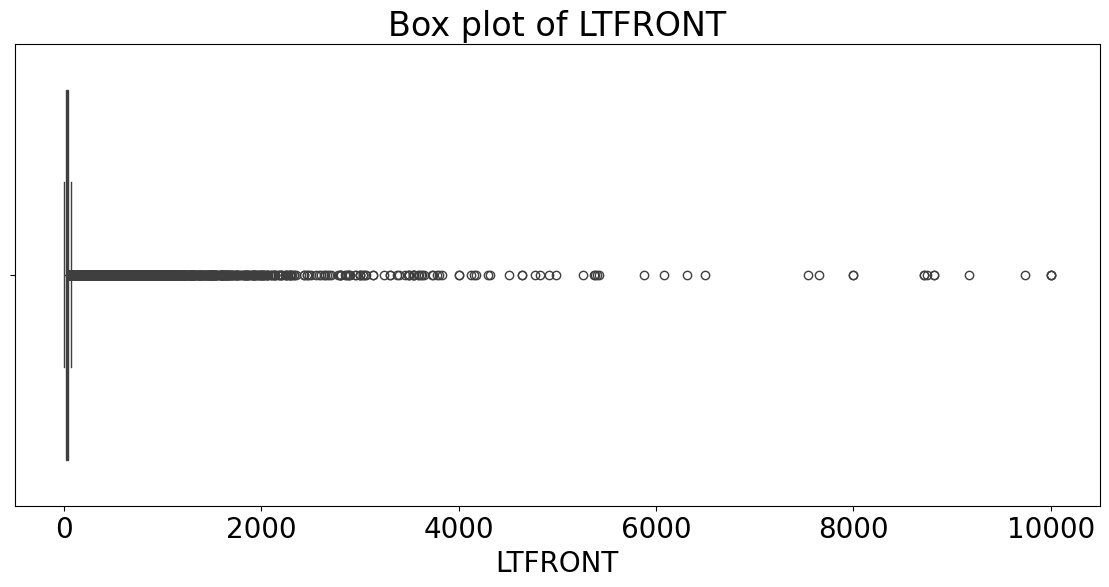

In [66]:
sns.boxplot(x = 'LTFRONT', data = data)

plt.xlabel('LTFRONT')
plt.title('Box plot of LTFRONT')

plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


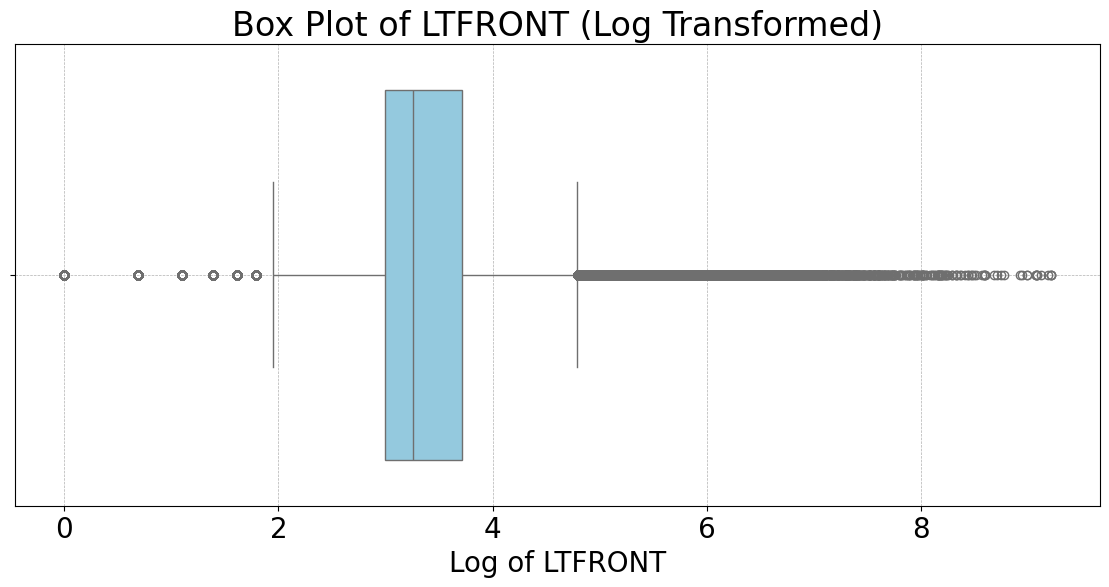

In [67]:
# log transformation
data['LTFRONT_log'] = np.log1p(data['LTFRONT'])

sns.boxplot(x='LTFRONT_log', data=data, color='skyblue')  # Change color as needed
plt.title('Box Plot of LTFRONT (Log Transformed)')
plt.xlabel('Log of LTFRONT')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines for better readability
plt.show()

/tmp/ipykernel_4986/555131603.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['LTFRONT'],bins = 100, kde = True)


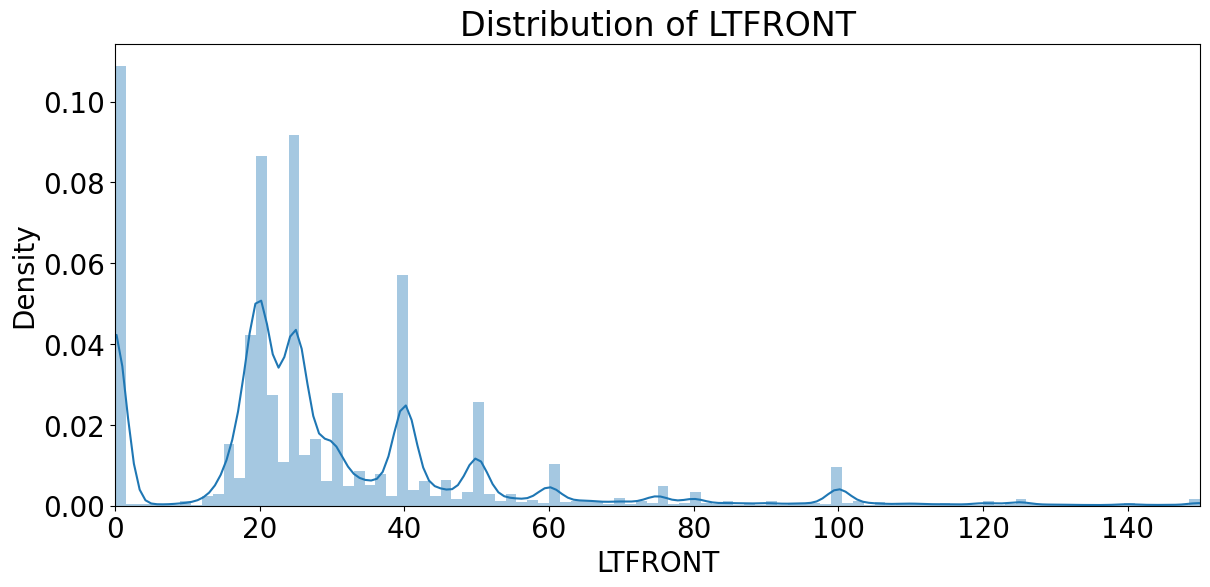

In [68]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['LTFRONT'] <= xhigh]
sns.distplot(temp['LTFRONT'],bins = 100, kde = True)

plt.xlabel('LTFRONT')
plt.ylabel('Density')
plt.title('Distribution of LTFRONT')
plt.show()

/tmp/ipykernel_4986/353046583.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['LTFRONT'], bins = 10, kde = False, color = 'dodgerblue')


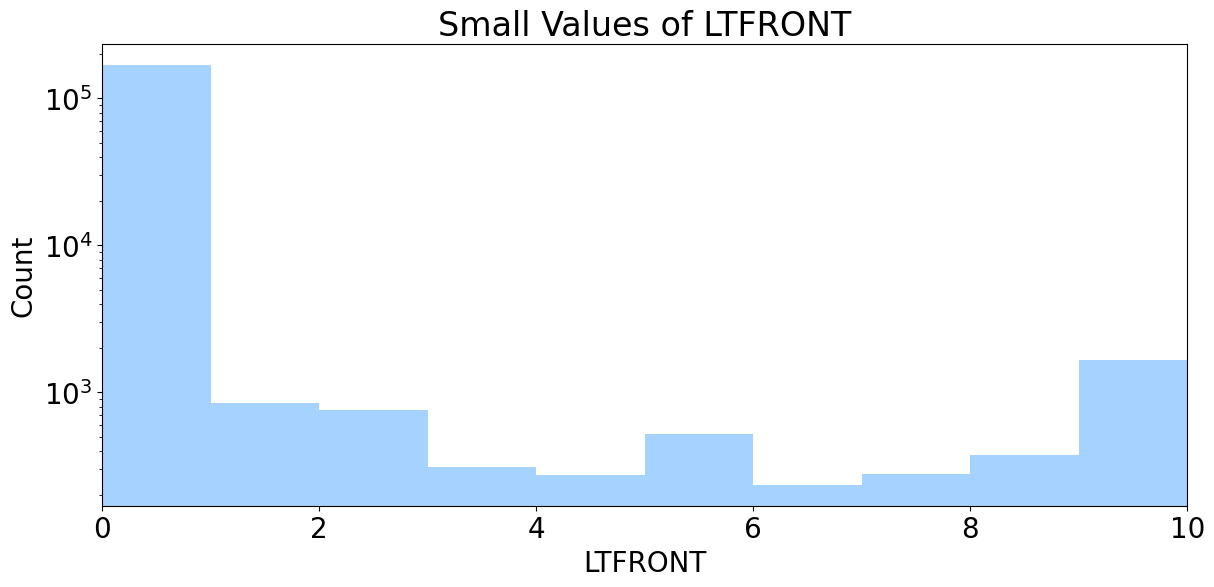

In [69]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0, xhigh)
temp = data[data['LTFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTFRONT'], bins = 10, kde = False, color = 'dodgerblue')
plt.xlabel('LTFRONT')
plt.ylabel('Count')
plt.title('Small Values of LTFRONT')

plt.savefig('LTFRONT small')

NameError: name 'hist' is not defined

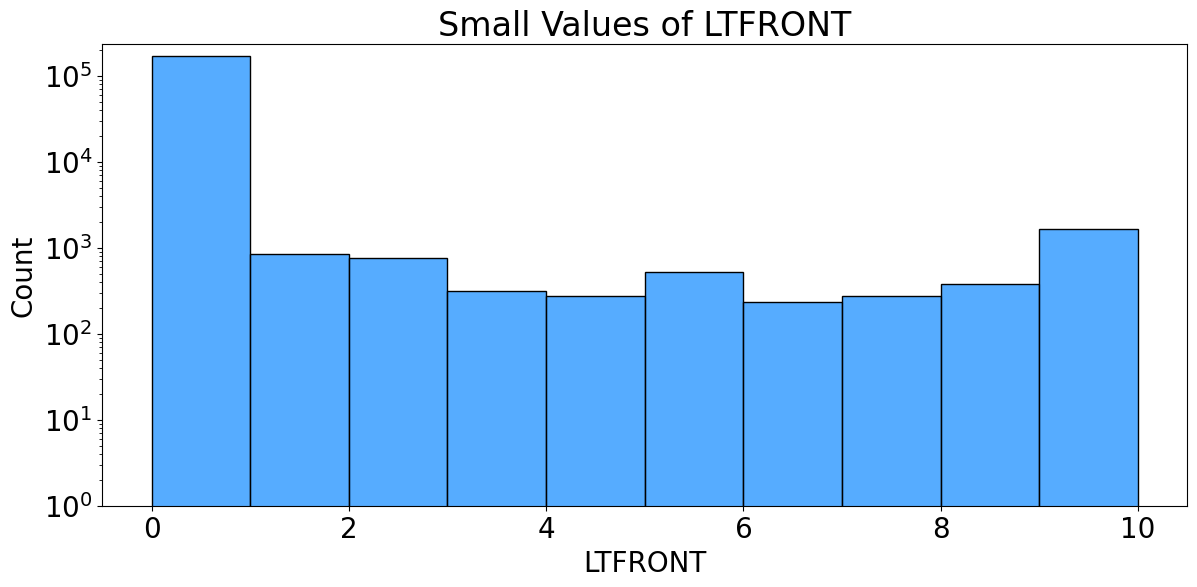

In [70]:
# Assuming data is loaded into 'data'
xhigh = 10
temp = data[data['LTFRONT'] <= xhigh]

# Setting bin edges to ensure appropriate representation
bin_edges = np.arange(0, xhigh + 1, 1)  # Create bins from 0 to 10 with a step of 1

ax = plt.gca()

# Plotting
sns.histplot(temp['LTFRONT'], bins=bin_edges, kde=False, color='dodgerblue')

# Set y-scale to log and adjust the ylim to avoid log(0) issue
plt.yscale('log')
ax.set_ylim(bottom=1)  # Setting the bottom to 1 because log(0) is undefined

# Labeling
plt.xlabel('LTFRONT')
plt.ylabel('Count')
plt.title('Small Values of LTFRONT')

# Adding labels on top of each bar
for p in hist.patches:
    height = p.get_height()
    if height > 0:  # To avoid log(0) and only label bars with counts
        plt.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom', color='black', fontsize=12)


# Enhance visibility
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  # Add grid for both major and minor ticks
ax.tick_params(axis='both', which='both', labelsize=12)  # Adjust tick parameters for better readability

## LTDEPTH

In [71]:
len(data['LTDEPTH'].unique())

1370

In [72]:
data['LTDEPTH'].count() * 100 / numrecords

100.0

In [73]:
data['LTDEPTH'].value_counts()

LTDEPTH
100     464541
0       170128
95       31612
90       20294
80       16671
         ...  
1252         1
1567         1
1305         1
2532         1
1419         1
Name: count, Length: 1370, dtype: int64

In [74]:
data['LTDEPTH'].max()

9999

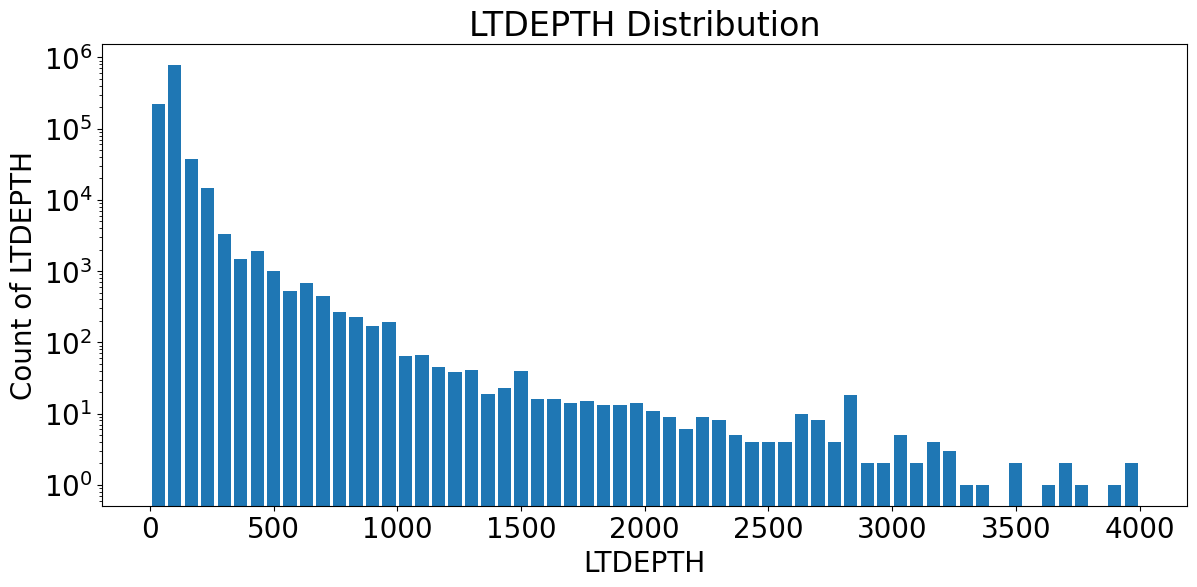

In [75]:
# plotting a histogram
range = (0, 4000)
bins = 60

plt.hist(data['LTDEPTH'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('LTDEPTH')
plt.ylabel('Count of LTDEPTH')
plt.title('LTDEPTH Distribution')

plt.savefig('LTDEPTH')

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


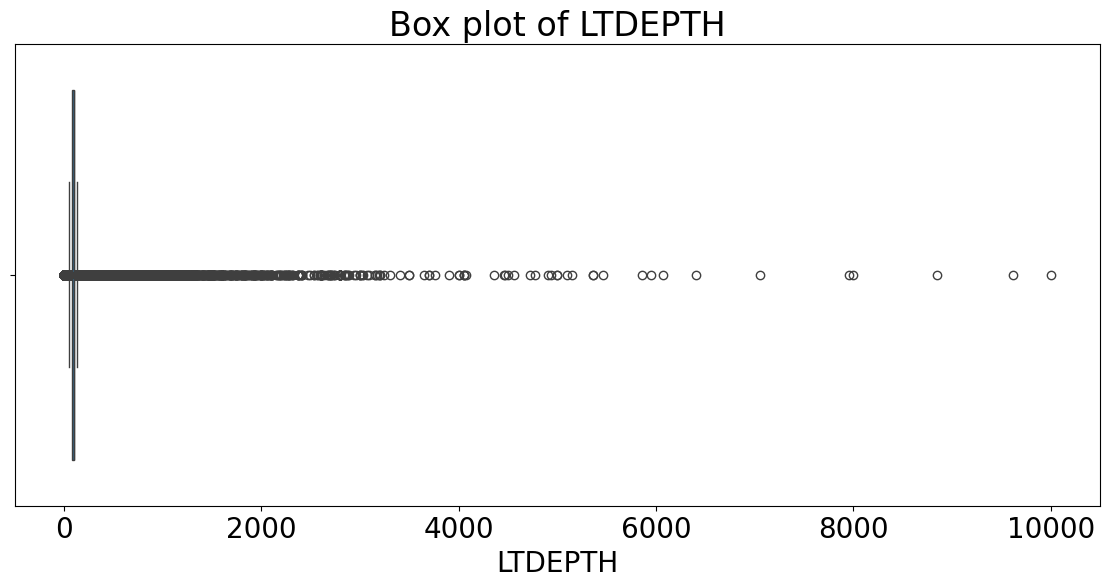

In [76]:
sns.boxplot(x = 'LTDEPTH', data = data)

plt.xlabel('LTDEPTH')
plt.title('Box plot of LTDEPTH')

plt.show()

/tmp/ipykernel_4986/3994504826.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['LTDEPTH'],bins = 100, kde = True)


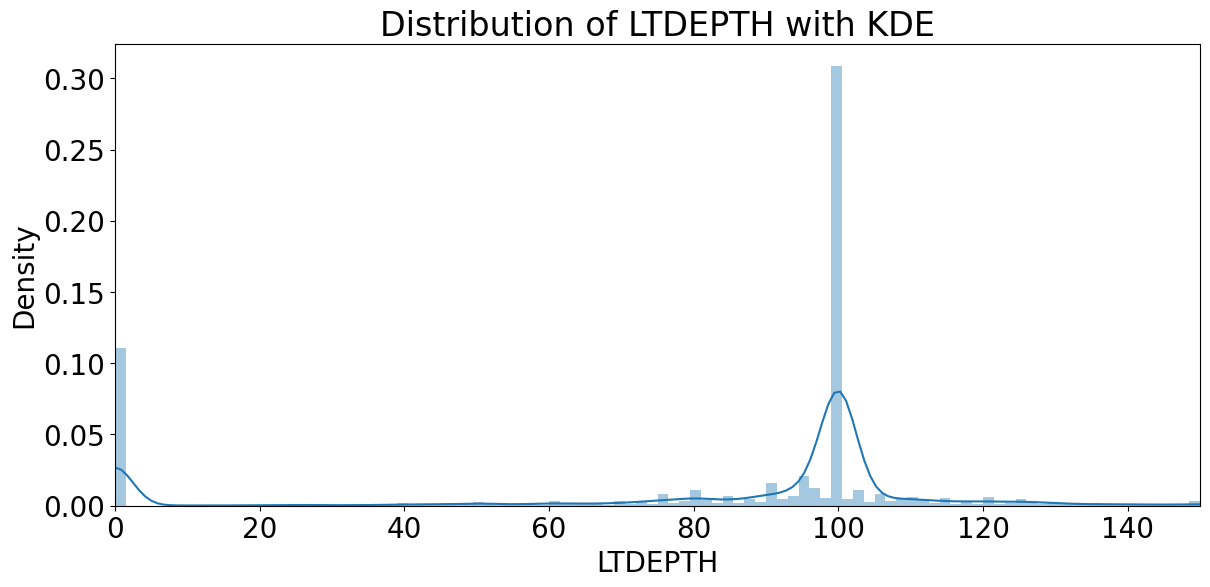

In [77]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
sns.distplot(temp['LTDEPTH'],bins = 100, kde = True)

plt.xlabel('LTDEPTH')
plt.ylabel('Density')
plt.title('Distribution of LTDEPTH with KDE')
plt.show()

/tmp/ipykernel_4986/2780569287.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['LTDEPTH'], bins = 10, kde = False, color = 'dodgerblue')


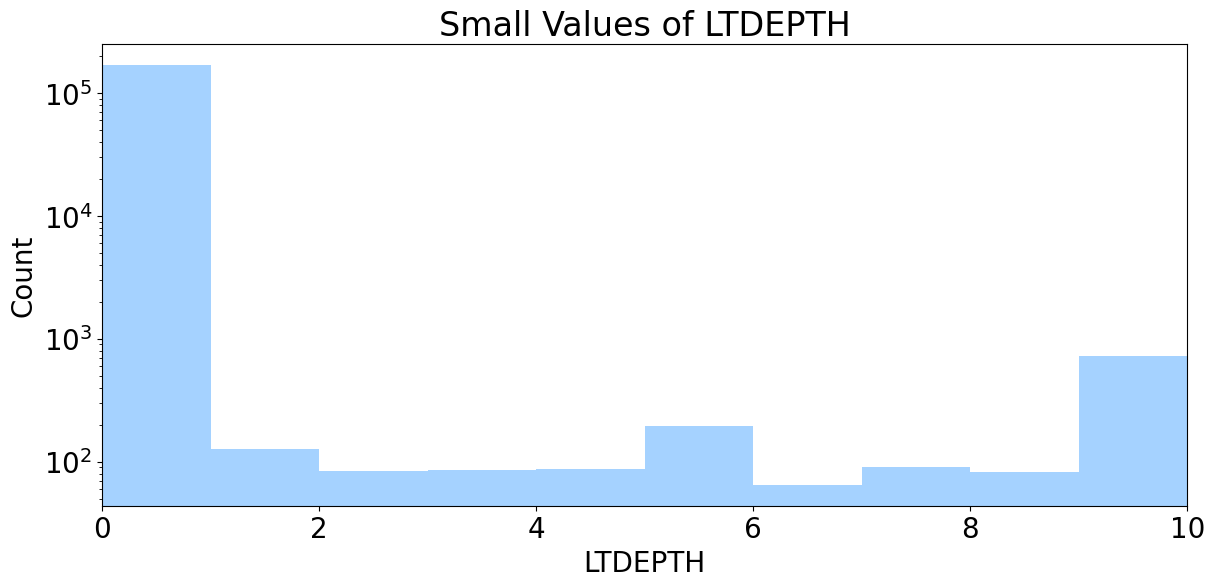

In [78]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0, xhigh)
temp = data[data['LTDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['LTDEPTH'], bins = 10, kde = False, color = 'dodgerblue')
plt.xlabel('LTDEPTH')
plt.ylabel('Count')
plt.title('Small Values of LTDEPTH')

plt.savefig('LTDEPTH small')

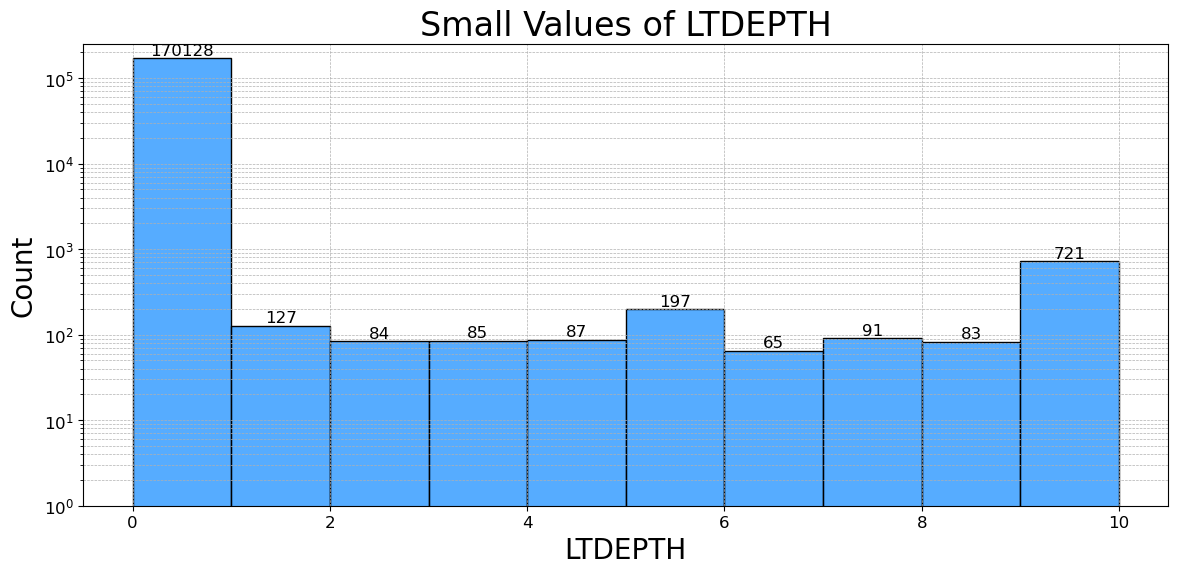

In [79]:
# Assuming data is loaded into 'data'
xhigh = 10
temp = data[data['LTDEPTH'] <= xhigh]

# Setting bin edges to ensure appropriate representation
bin_edges = np.arange(0, xhigh + 1, 1)  # Create bins from 0 to 10 with a step of 1

ax = plt.gca()

# Plotting
hist = sns.histplot(temp['LTDEPTH'], bins=bin_edges, kde=False, color='dodgerblue')

# Set y-scale to log and adjust the ylim to avoid log(0) issue
plt.yscale('log')
ax.set_ylim(bottom=1)  # Setting the bottom to 1 because log(0) is undefined

# Labeling
plt.xlabel('LTDEPTH')
plt.ylabel('Count')
plt.title('Small Values of LTDEPTH')

# Adding labels on top of each bar
for p in hist.patches:
    height = p.get_height()
    if height > 0:  # To avoid log(0) and only label bars with counts
        plt.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha='center', va='bottom', color='black', fontsize=12)

# Enhance visibility
plt.grid(True, which="both", linestyle='--', linewidth=0.5)  # Add grid for both major and minor ticks
ax.tick_params(axis='both', which='both', labelsize=12)  # Adjust tick parameters for better readability

plt.show()

## EXT

In [80]:
len(data['EXT'].unique())

4

In [81]:
data['EXT'].unique()

# count of each value
data['EXT'].value_counts()

EXT
G     266970
E      49442
EG     37893
Name: count, dtype: int64

In [82]:
data['EXT'].count() * 100 / numrecords

33.081884679092504

In [83]:
data['EXT'].value_counts()

EXT
G     266970
E      49442
EG     37893
Name: count, dtype: int64

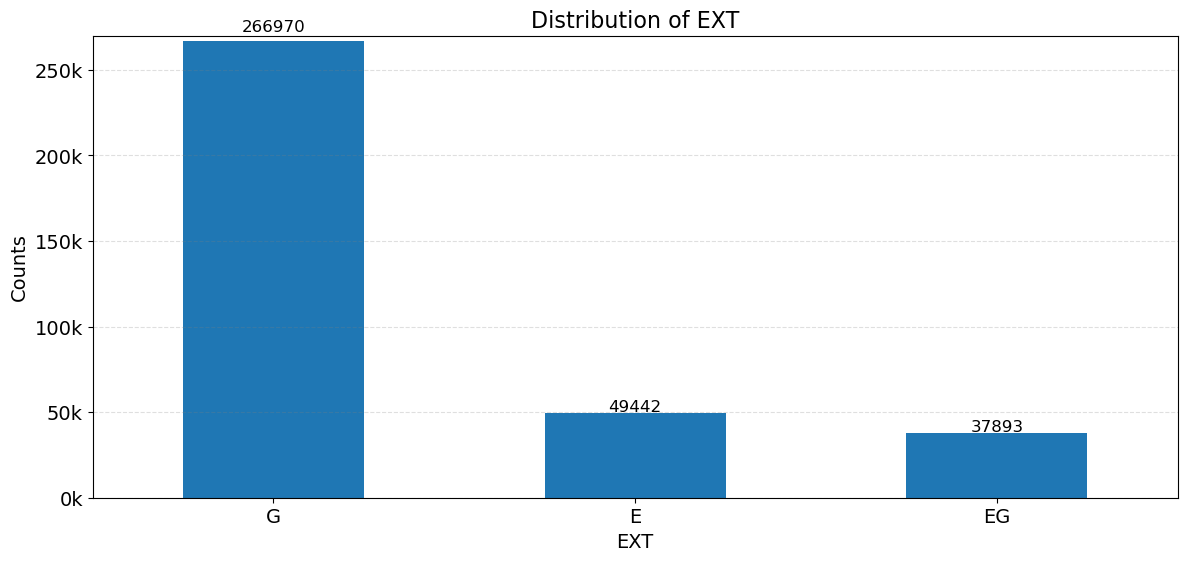

In [84]:
# Generate the bar plot
counts = data['EXT'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.ylim(0,270000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.02, str(v), color='black', ha='center', fontsize=12)

# Set titles for the graph and axes
plt.title('Distribution of EXT', fontsize=16)
plt.xlabel('EXT', fontsize=14)
plt.ylabel('Counts', rotation=90, fontsize=14)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)

#set y axis to xxxk
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x/1000:.0f}k"))

plt.savefig('EXT')

## STORIES

In [85]:
len(data['STORIES'].unique())

112

In [86]:
data['STORIES'].count() * 100 / numrecords

94.74656253909919

In [87]:
data['STORIES'].value_counts()

STORIES
2.00      415092
3.00      130127
1.00       96706
2.50       82292
4.00       38342
           ...  
78.00          1
61.00          1
2.10           1
114.00         1
82.00          1
Name: count, Length: 111, dtype: int64

In [88]:
data['STORIES'].max()

119.0

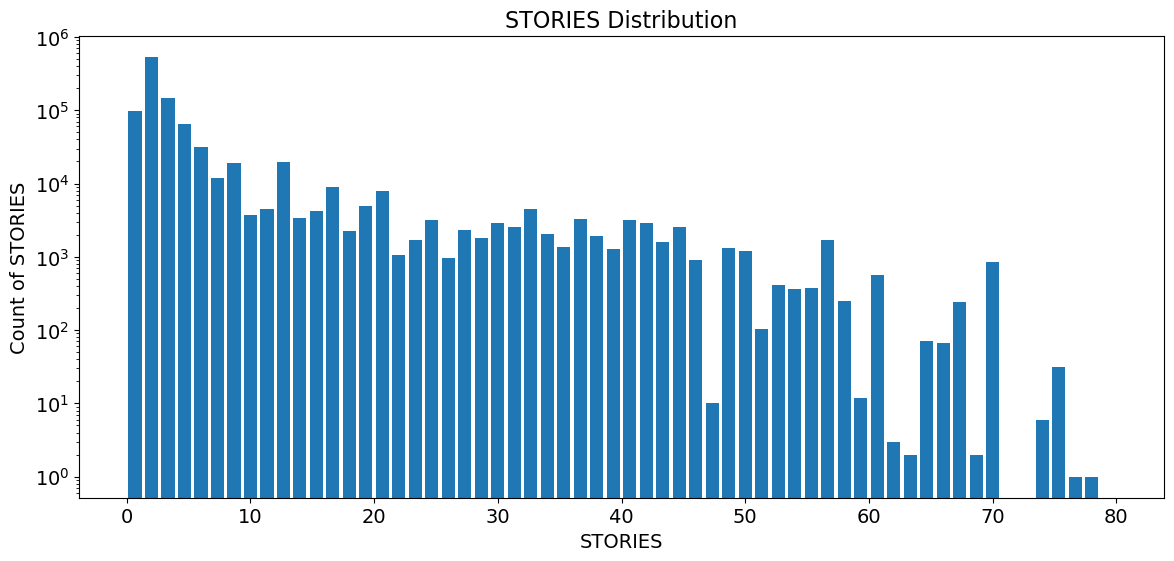

In [89]:
# plotting a histogram
range = (0, 80)
bins = 60

plt.hist(data['STORIES'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('STORIES', fontsize = 14)
plt.ylabel('Count of STORIES', fontsize = 14)
plt.title('STORIES Distribution', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('STORIES')

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


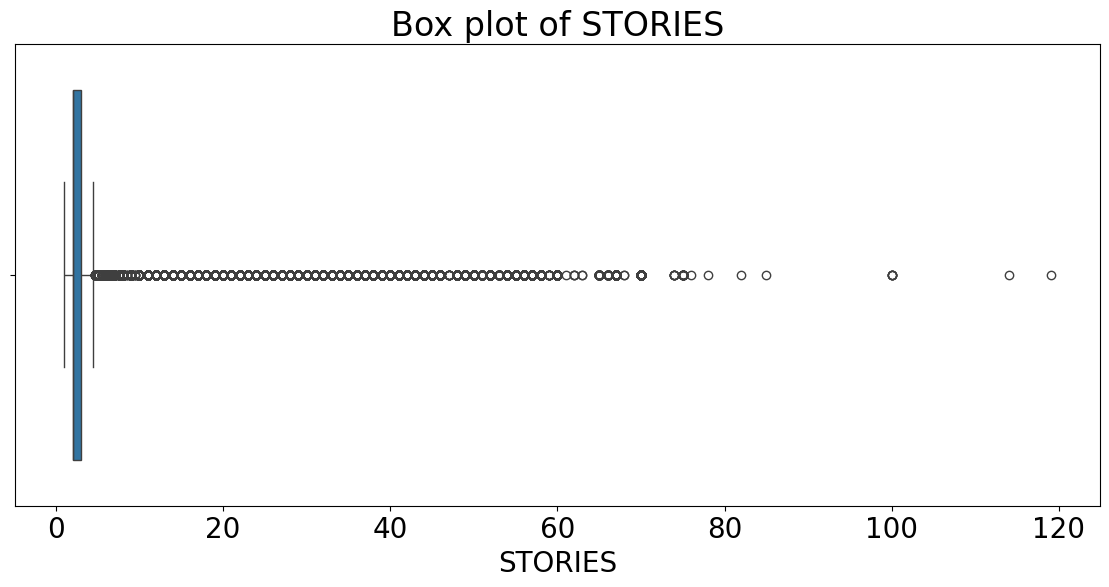

In [90]:
sns.boxplot(x = 'STORIES', data = data)

plt.xlabel('STORIES')
plt.title('Box plot of STORIES')

plt.show()

/tmp/ipykernel_4986/1851768670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['STORIES'],bins = 21, kde = True)


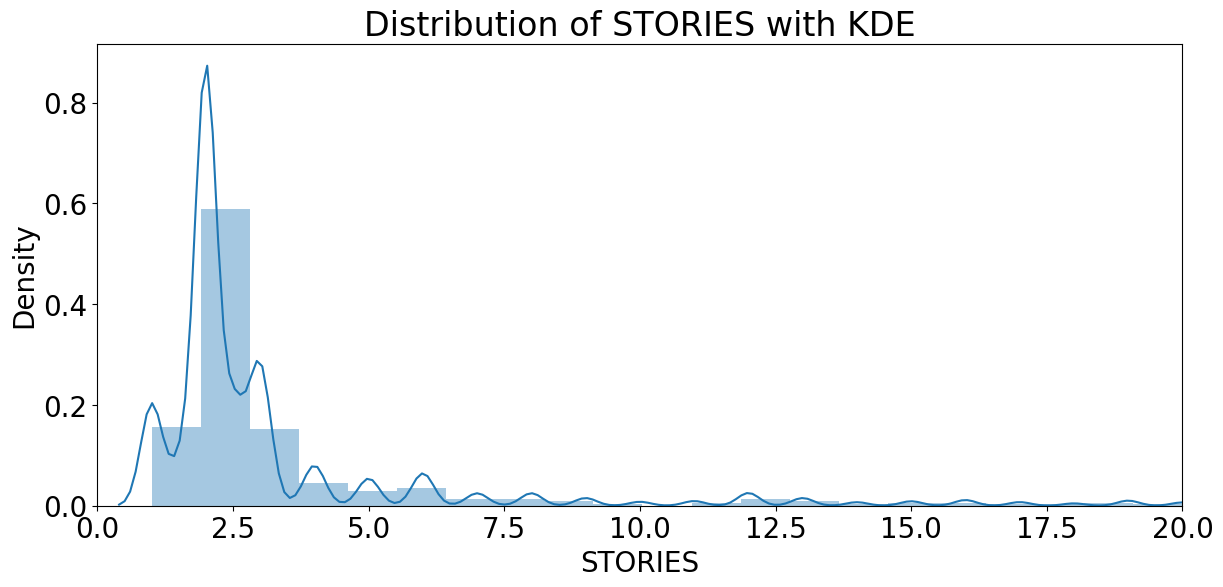

In [91]:
xhigh = 20
temp = data[data['STORIES'] > 0]
temp.count()
plt.xlim(0, xhigh)
temp = data[data['STORIES'] <= xhigh]
sns.distplot(temp['STORIES'],bins = 21, kde = True)

plt.xlabel('STORIES')
plt.ylabel('Density')
plt.title('Distribution of STORIES with KDE')
plt.show()

## FULLVAL

In [92]:
len(data['FULLVAL'].unique())

109324

In [93]:
data['FULLVAL'].count() * 100 / numrecords

100.0

In [94]:
data['FULLVAL'].value_counts()

FULLVAL
0.00          13007
502000.00      2796
366000.00      2290
397000.00      2231
472000.00      2223
              ...  
770949.00         1
220739.00         1
815522.00         1
1185230.00        1
883453.00         1
Name: count, Length: 109324, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


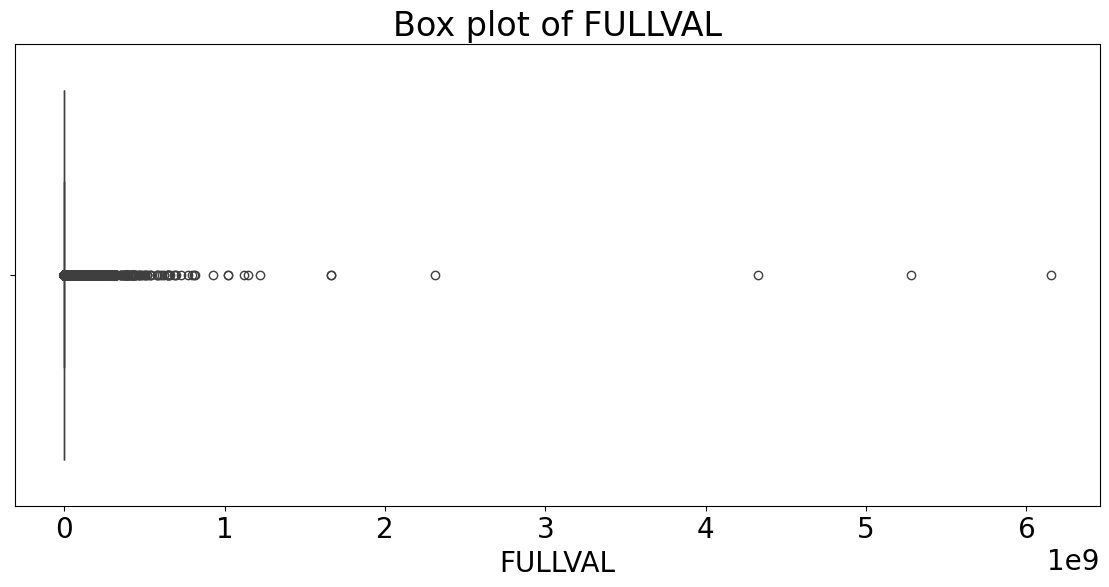

In [95]:
sns.boxplot(x = 'FULLVAL', data = data)

plt.xlabel('FULLVAL')
plt.title('Box plot of FULLVAL')

plt.show()

In [96]:
# xhigh = 2000000
# plt.xlim(0, xhigh)
# temp = data[data['FULLVAL'] <= xhigh]
# sns.distplot(temp['FULLVAL'], bins = 100, kde = False)


# plt.xlabel('FULLVAL', fontsize = 14)
# plt.ylabel('Density', fontsize = 14)
# plt.title('Distribution of FULLVAL', fontsize = 16)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 14)

# ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x/1000:.0f}k"))

# plt.show()
# plt.savefig('FULLVAL')

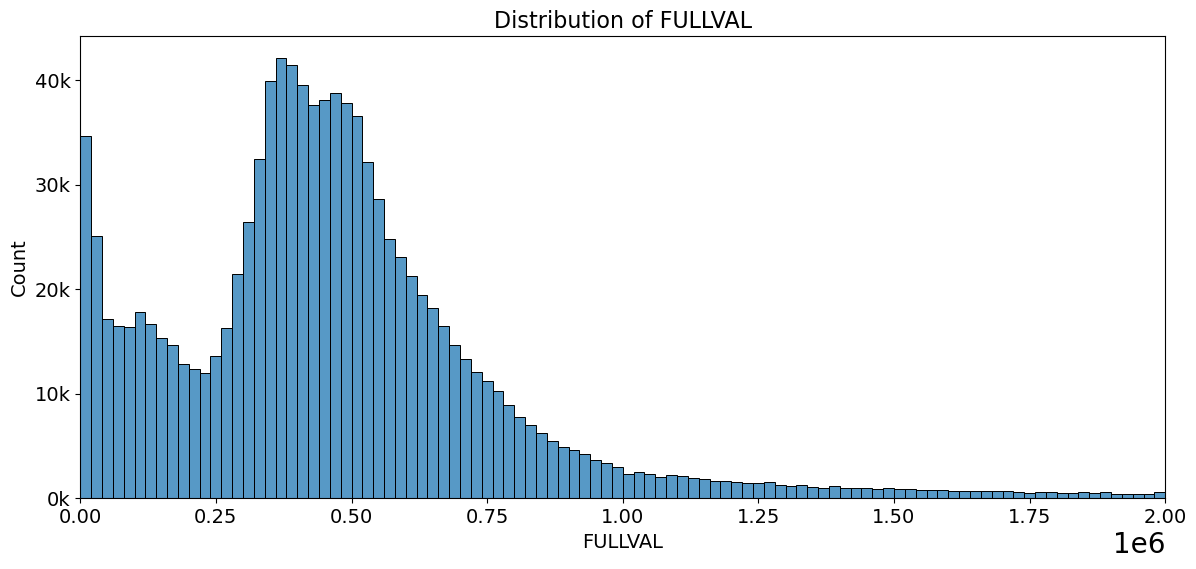

In [97]:
xhigh = 2000000
temp = data[data['FULLVAL'] <= xhigh]


# 使用 histplot 替代 distplot
sns.histplot(temp['FULLVAL'], bins=100, kde=False)

# 设置 x 轴和 y 轴的限制
plt.xlim(0, xhigh)

# 标签和标题
plt.xlabel('FULLVAL', fontsize=14)
plt.ylabel('Count', fontsize=14)  # 修改为计数
plt.title('Distribution of FULLVAL', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 设置 y 轴的格式化显示
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x/1000:.0f}k"))

# 保存图形之前先显示
plt.savefig('FULLVAL.png')
plt.show()

/tmp/ipykernel_4986/3152758831.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['FULLVAL'],bins = 200, kde = False)


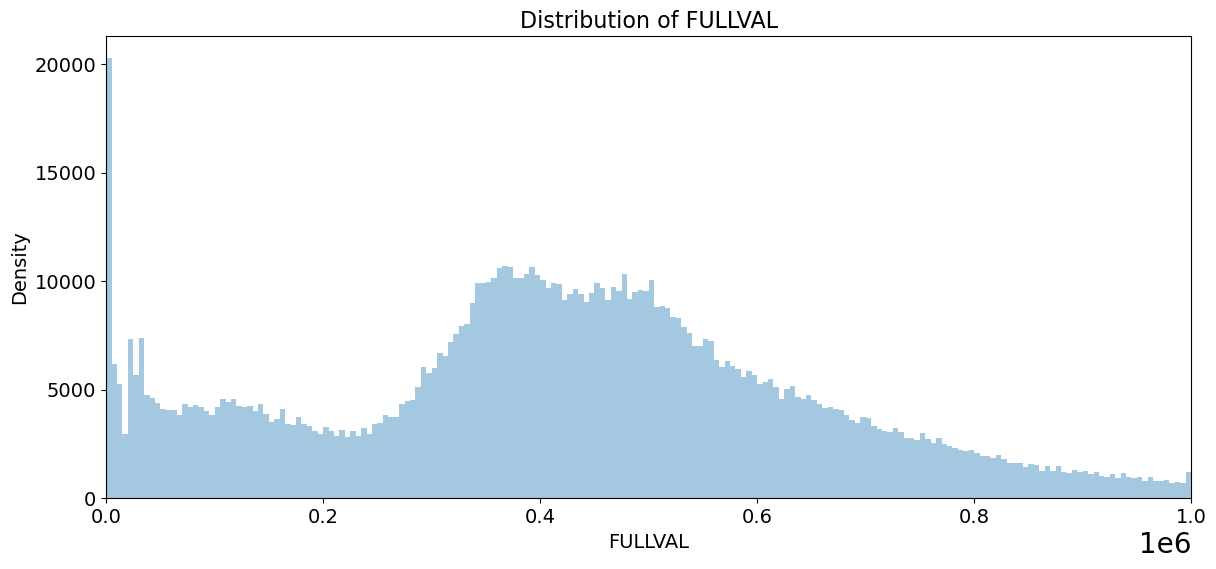

In [98]:
xhigh = 1000000
plt.xlim(0,xhigh)
temp = data[data['FULLVAL'] <= xhigh]
sns.distplot(temp['FULLVAL'],bins = 200, kde = False)


plt.xlabel('FULLVAL', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of FULLVAL', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

## AVLAND

In [99]:
len(data['AVLAND'].unique())

70921

In [100]:
data['AVLAND'].count() * 100 / numrecords

100.0

In [101]:
data['AVLAND'].value_counts()

AVLAND
0.00        13009
45000.00     1229
90000.00      999
3045.00       873
22500.00      847
            ...  
76347.00        1
89178.00        1
82761.00        1
38044.00        1
34827.00        1
Name: count, Length: 70921, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


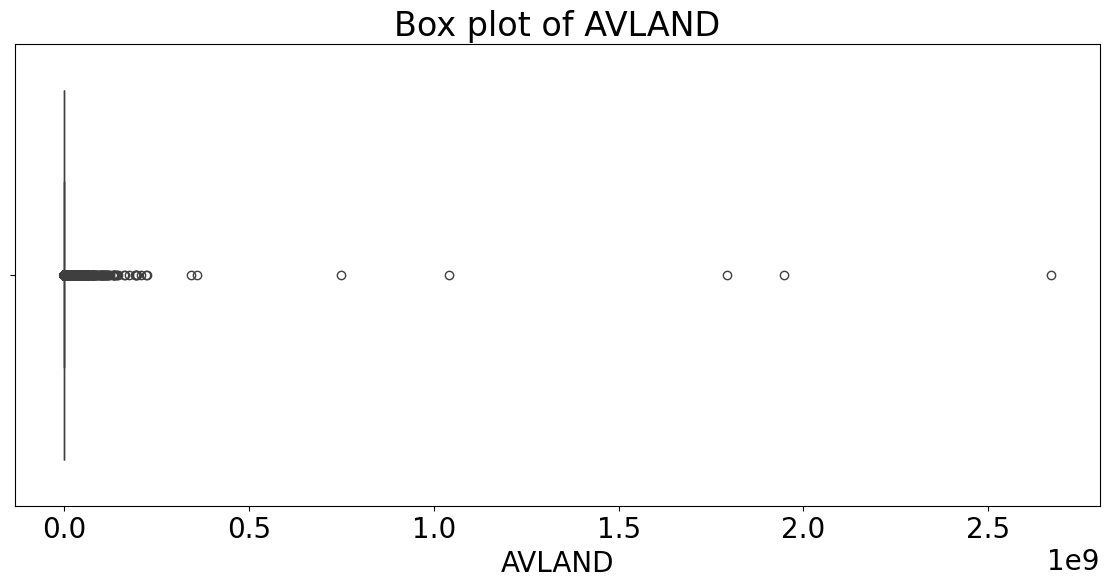

In [102]:
sns.boxplot(x = 'AVLAND', data = data)

plt.xlabel('AVLAND')
plt.title('Box plot of AVLAND')

plt.show()

/tmp/ipykernel_4986/2769874906.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['AVLAND'],bins=100, kde = False)


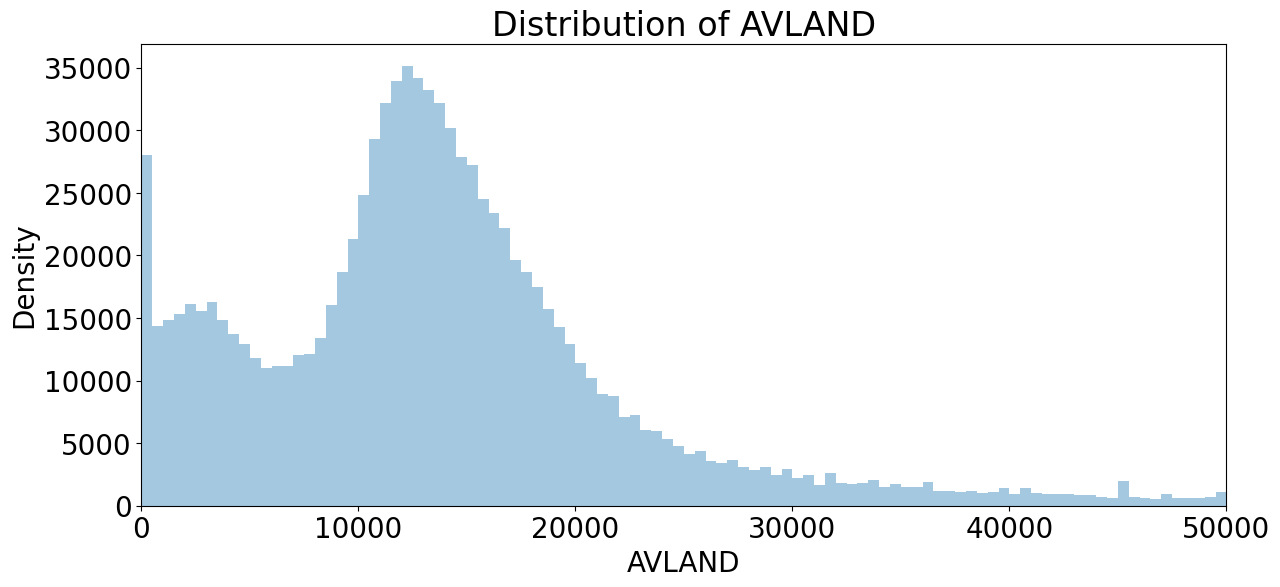

<Figure size 1400x600 with 0 Axes>

In [103]:
xhigh = 50000
plt.xlim(0, xhigh)
temp = data[data['AVLAND'] <= xhigh]
sns.distplot(temp['AVLAND'],bins=100, kde = False)

plt.xlabel('AVLAND')
plt.ylabel('Density')
plt.title('Distribution of AVLAND')

plt.show()
plt.savefig('AVLAND')

/tmp/ipykernel_4986/998095138.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['AVLAND'], bins=100, kde=False)


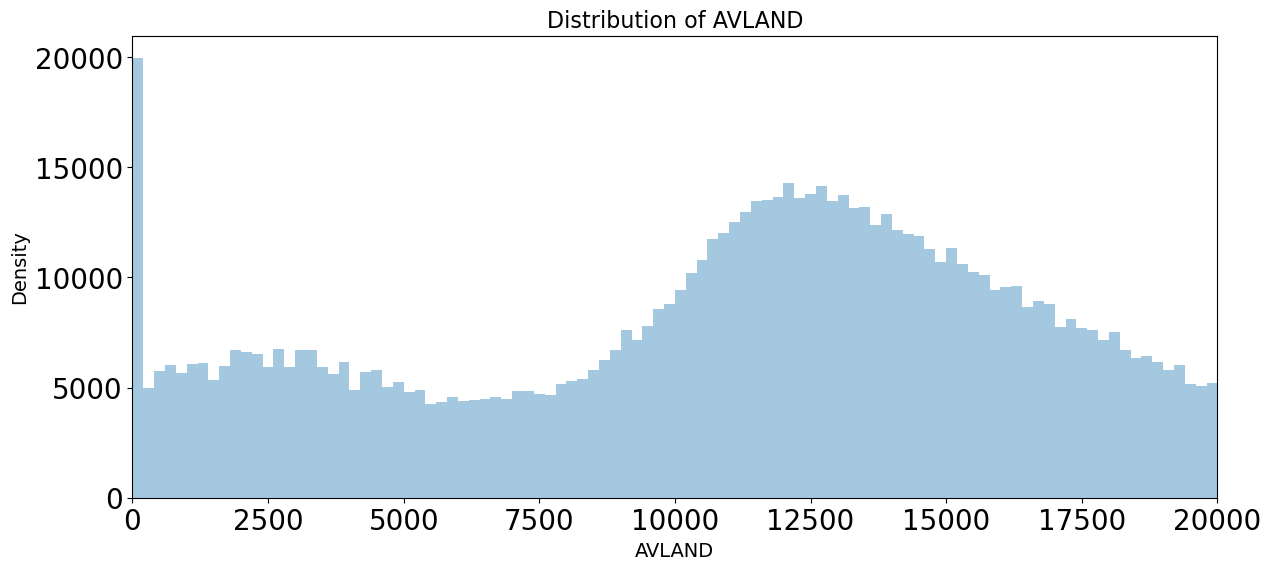

In [104]:
xhigh = 20000  # Reduce to focus on the peak density
plt.xlim(0, xhigh)
temp = data[data['AVLAND'] <= xhigh]
sns.distplot(temp['AVLAND'], bins=100, kde=False)

plt.xlabel('AVLAND', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of AVLAND', fontsize=16)

plt.show()


## AVTOT

In [105]:
len(data['AVTOT'].unique())

112914

In [106]:
data['AVTOT'].count() * 100 / numrecords

100.0

In [107]:
data['AVTOT'].value_counts()

AVTOT
0.00         13007
16588.00      3129
17914.00      2989
18973.00      2457
19780.00      2450
             ...  
77868.00         1
47068.00         1
40715.00         1
113239.00        1
23795.00         1
Name: count, Length: 112914, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


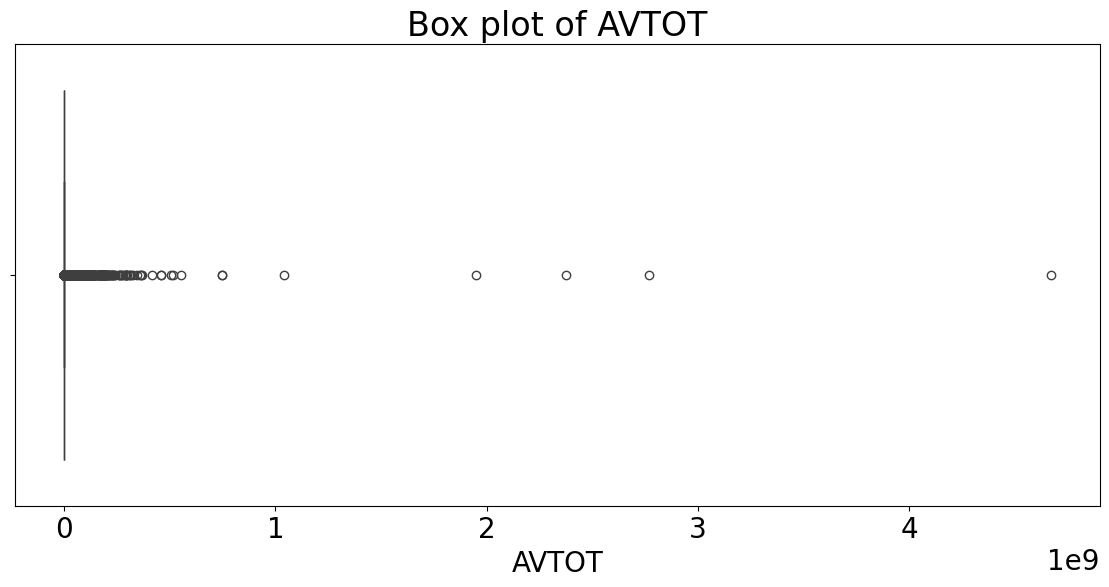

In [108]:
sns.boxplot(x = 'AVTOT', data = data)

plt.xlabel('AVTOT')
plt.title('Box plot of AVTOT')

plt.show()

/tmp/ipykernel_4986/3423865427.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['AVTOT'],bins = 100, kde = False)


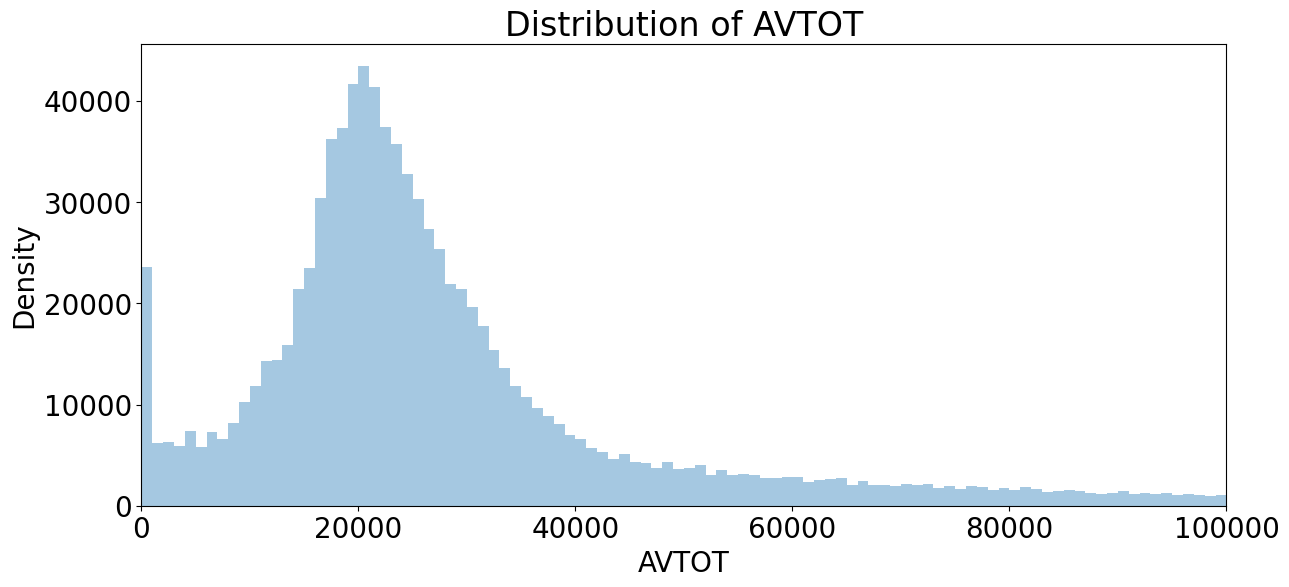

<Figure size 1400x600 with 0 Axes>

In [109]:
xhigh = 100000
plt.xlim(0, xhigh)
temp = data[data['AVTOT'] <= xhigh]
sns.distplot(temp['AVTOT'],bins = 100, kde = False)

plt.xlabel('AVTOT')
plt.ylabel('Density')
plt.title('Distribution of AVTOT')

plt.show()
plt.savefig('AVTOT')

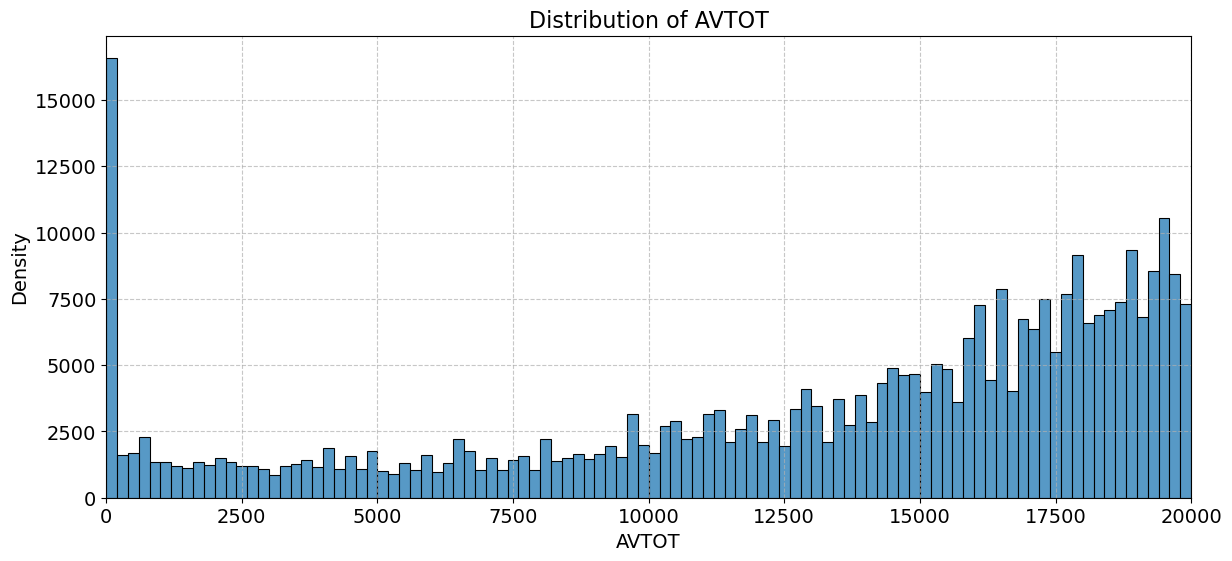

<Figure size 1400x600 with 0 Axes>

In [206]:
xhigh = 20000  # Lower the x-axis limit to focus on where the majority of data lies
plt.xlim(0, xhigh)
temp = data[data['AVTOT'] <= xhigh]
sns.histplot(temp['AVTOT'], bins=100, kde=False, edgecolor='black')

#sns.distplot(temp['AVTOT'], bins=100, kde=False)

plt.xlabel('AVTOT', fontsize=14)    
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of AVTOT', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, which='both', linestyle='--', alpha=0.7)

# peak_index = np.argmax(counts)  # Index of the peak in counts
# peak_x = (bin_edges[peak_index] + bin_edges[peak_index + 1]) / 2  # Midpoint of the bin
# peak_y = counts[peak_index]  # Height of the bin

# plt.annotate('Peak Value', xy=(peak_x, peak_y), xytext=(peak_x + 2000, peak_y + 5000),
#              arrowprops=dict(facecolor='black', shrink=0.1), ha='center')


plt.show()
plt.savefig('AVTOT')

## EXLAND

In [111]:
len(data['EXLAND'].unique())

33419

In [112]:
data['EXLAND'].count() * 100 / numrecords

100.0

In [113]:
data['EXLAND'].value_counts()

EXLAND
0.00        491699
1620.00     357182
2090.00      31112
3240.00      21519
5760.00       3560
             ...  
45973.00         1
41042.00         1
37028.00         1
34354.00         1
18847.00         1
Name: count, Length: 33419, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


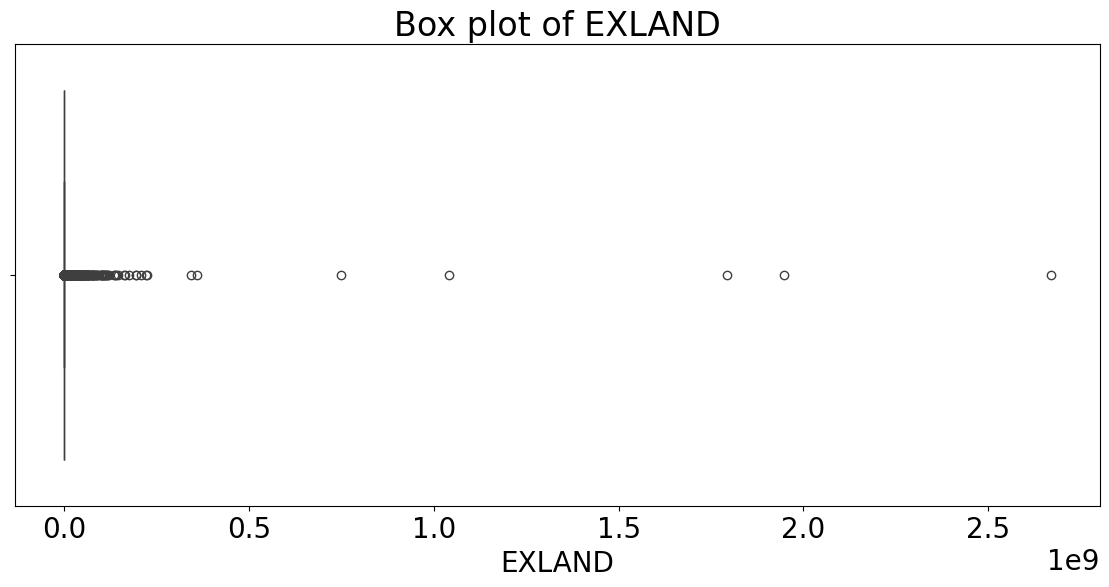

In [114]:
sns.boxplot(x = 'EXLAND', data = data)

plt.xlabel('EXLAND')
plt.title('Box plot of EXLAND')

plt.show()

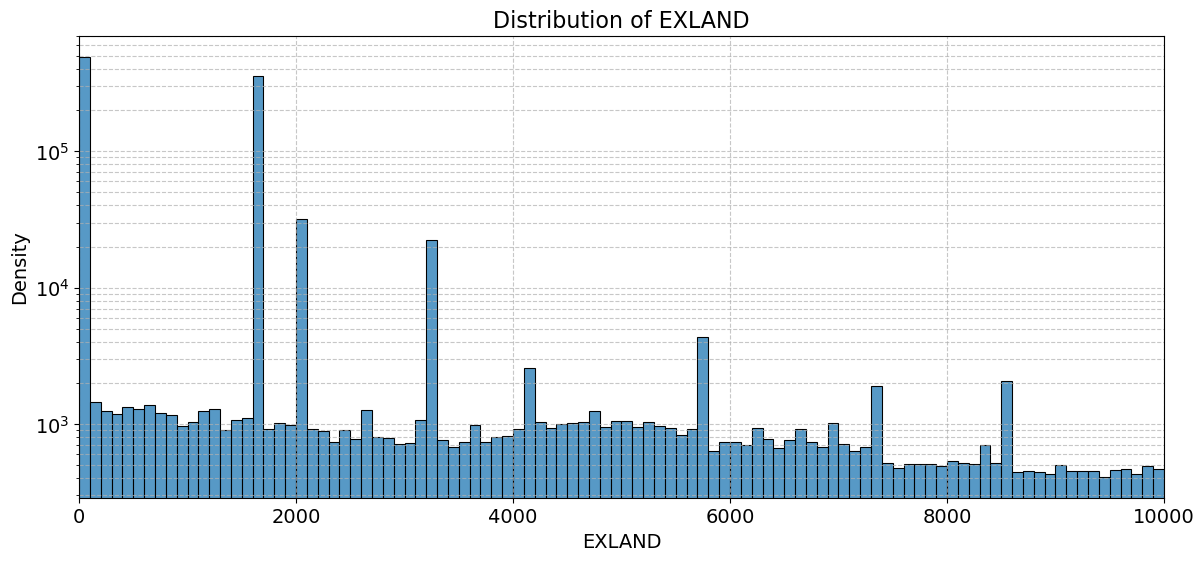

<Figure size 1400x600 with 0 Axes>

In [207]:
xhigh = 10000
plt.xlim(0, xhigh)
temp = data[data['EXLAND'] <= xhigh]
sns.histplot(temp['EXLAND'], bins=100, kde=False, edgecolor='black')
#sns.distplot(temp['EXLAND'],bins = 100, kde = False)

plt.yscale('log')
plt.xlabel('EXLAND', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of EXLAND', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.grid(True, which='both', linestyle='--', alpha=0.7)

# peak_index = np.argmax(counts)  # Index of the peak in counts
# peak_x = (bin_edges[peak_index] + bin_edges[peak_index + 1]) / 2  # Midpoint of the bin
# peak_y = counts[peak_index]  # Height of the bin

# plt.annotate('Peak Value', xy=(peak_x, peak_y), xytext=(peak_x + 2000, peak_y + 5000),
#              arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

plt.show()
plt.savefig('EXLAND')

## EXTOT

In [116]:
len(data['EXTOT'].unique())

64255

In [117]:
data['EXTOT'].count() * 100 / numrecords

100.0

In [118]:
data['EXTOT'].value_counts()

EXTOT
0.00         432572
1620.00      354880
2090.00       30069
3240.00       21803
5760.00        3549
              ...  
197442.00         1
331100.00         1
719300.00         1
50976.00          1
397554.00         1
Name: count, Length: 64255, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


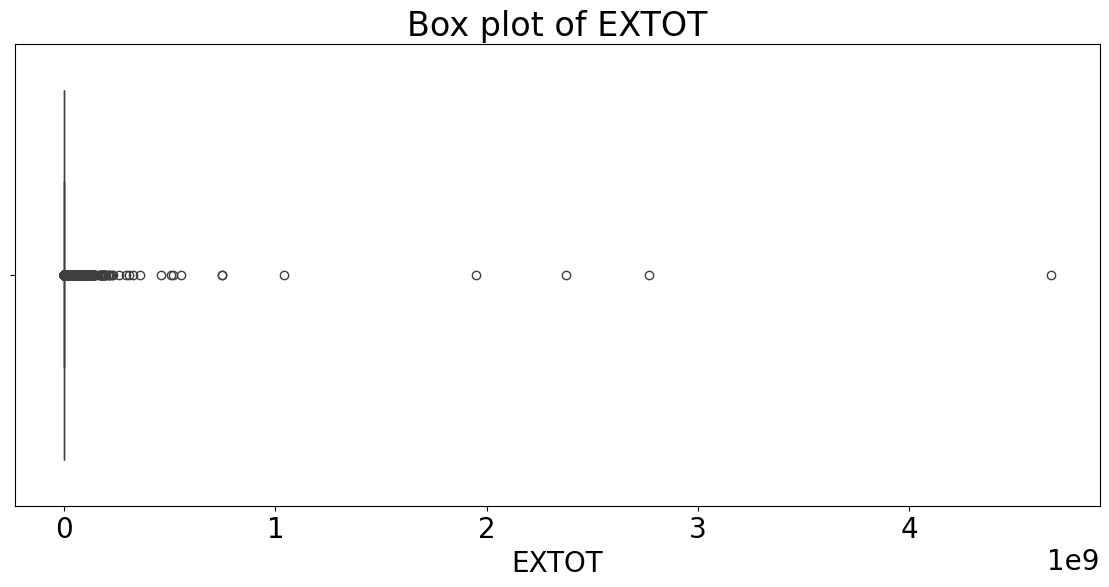

In [119]:
sns.boxplot(x = 'EXTOT', data = data)

plt.xlabel('EXTOT')
plt.title('Box plot of EXTOT')

plt.show()

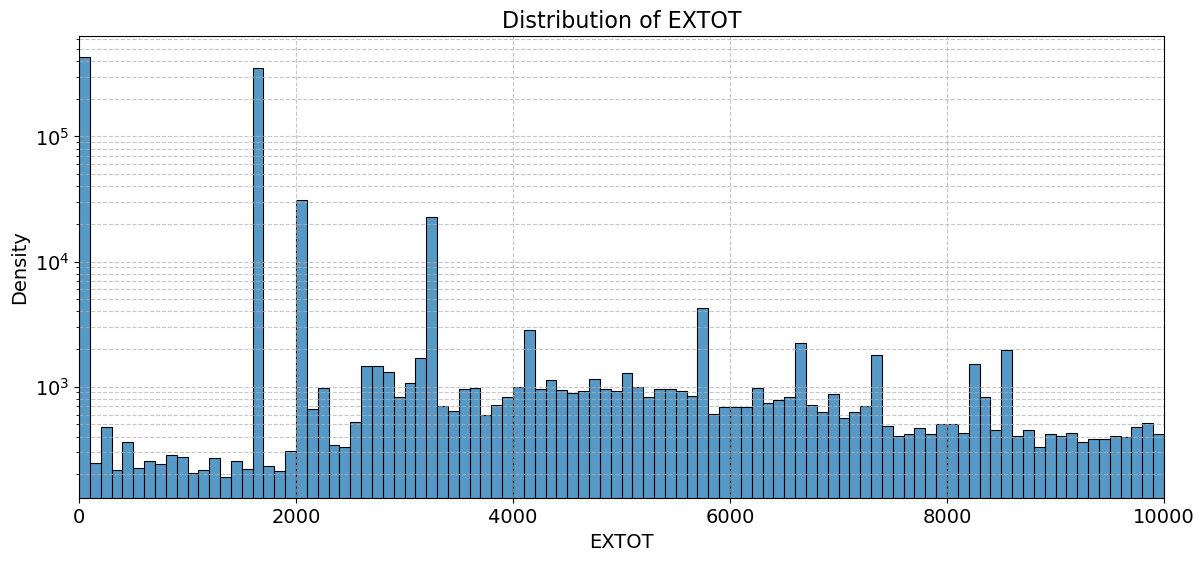

<Figure size 1400x600 with 0 Axes>

In [209]:
xhigh = 10000
plt.xlim(0, xhigh)
temp = data[data['EXTOT'] <= xhigh]
sns.histplot(temp['EXTOT'], bins=100, kde=False, edgecolor='black')
#sns.distplot(temp['EXTOT'],bins = 100, kde = False)

plt.yscale('log')
plt.xlabel('EXTOT', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of EXTOT', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.show()
plt.savefig('EXTOT')

## EXCD1

In [121]:
len(data['EXCD1'].unique())

130

In [122]:
data['EXCD1'].count() * 100 / numrecords

59.616393742635346

In [123]:
data['EXCD1'].value_counts()

EXCD1
1017.00    425348
1010.00     49756
1015.00     31323
5113.00     23858
1920.00     17594
            ...  
1606.00         1
4650.00         1
1841.00         1
1562.00         1
1992.00         1
Name: count, Length: 129, dtype: int64

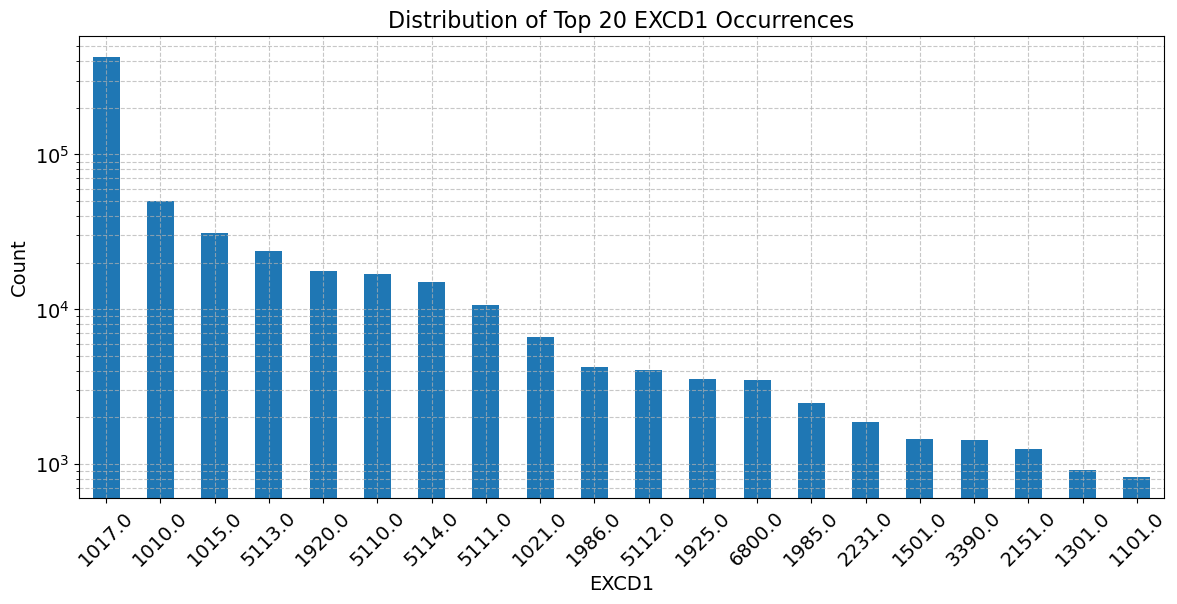

In [212]:
data['EXCD1'].value_counts().head(20).plot(kind = 'bar')
plt.yscale('log')

plt.xlabel('EXCD1', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Distribution of Top 20 EXCD1 Occurrences', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.yticks(fontsize = 14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)

plt.savefig('EXCD1')

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


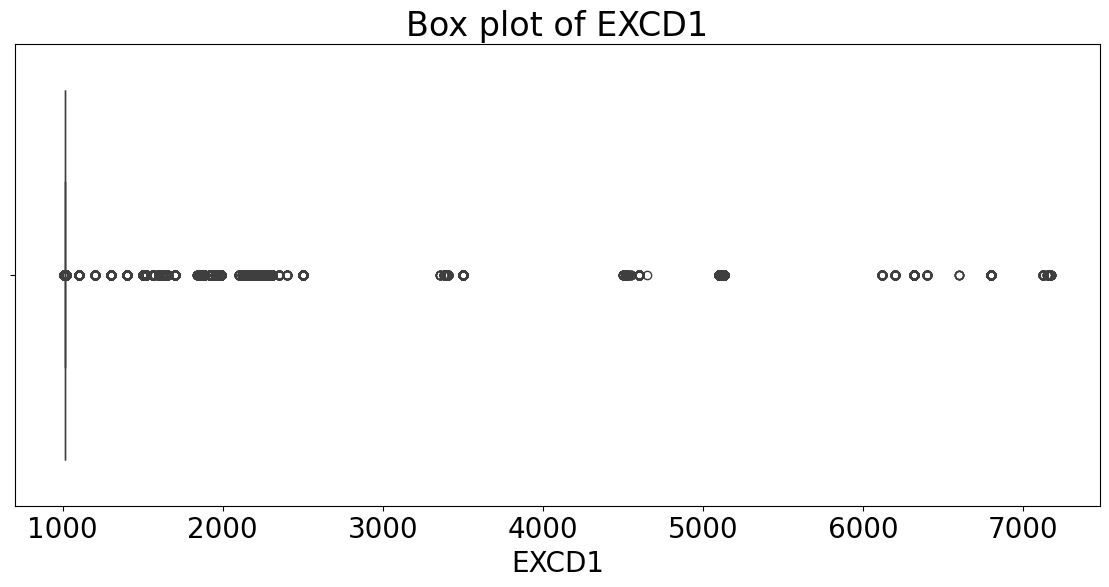

In [125]:
sns.boxplot(x = 'EXCD1', data = data)

plt.xlabel('EXCD1')
plt.title('Box plot of EXCD1')

plt.show()

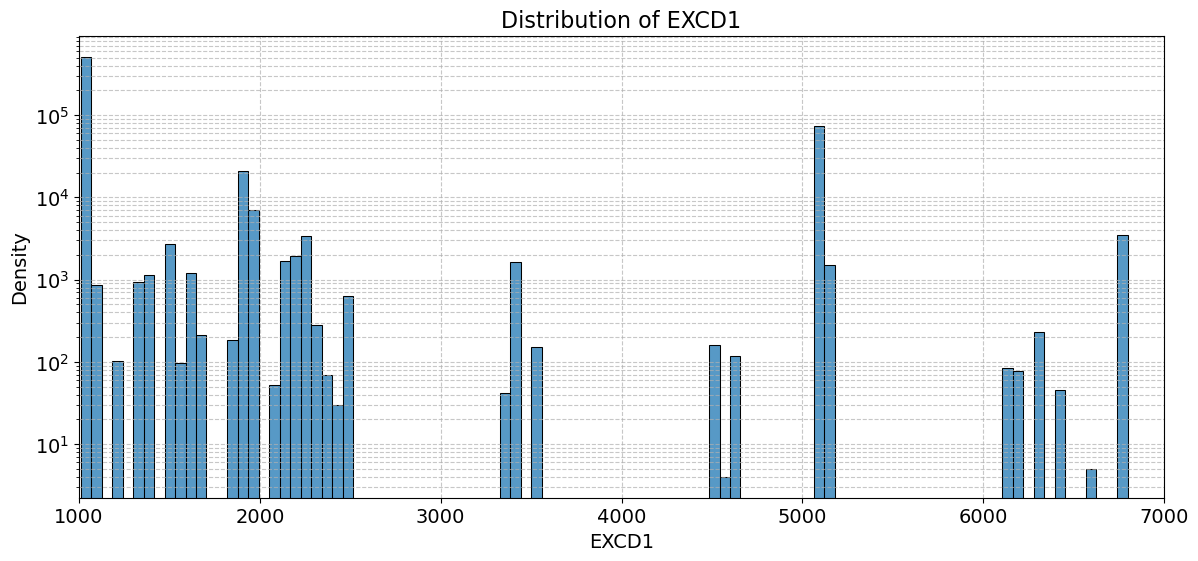

In [210]:
xhigh = 7000
plt.xlim(1000, xhigh)
temp = data[data['EXCD1'] <= xhigh]
sns.histplot(temp['EXCD1'], bins=100, kde=False, edgecolor='black')
#sns.distplot(temp['EXCD1'],bins = 100, kde = False)

plt.yscale('log')
plt.xlabel('EXCD1', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of EXCD1', fontsize = 16)
plt.xticks(fontsize = 14)   
plt.yticks(fontsize = 14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)


plt.show()

## STADDR

In [127]:
len(data['STADDR'].unique())

839281

In [128]:
data['STADDR'].count() * 100 / numrecords

99.93688106562689

In [129]:
data['STADDR'].value_counts()

STADDR
501 SURF AVENUE       902
330 EAST 38 STREET    817
322 WEST 57 STREET    720
155 WEST 68 STREET    671
20 WEST 64 STREET     657
                     ... 
1349 55 STREET          1
1347 55 STREET          1
1345 55 STREET          1
1343 55 STREET          1
162 BENTLEY STREET      1
Name: count, Length: 839280, dtype: int64

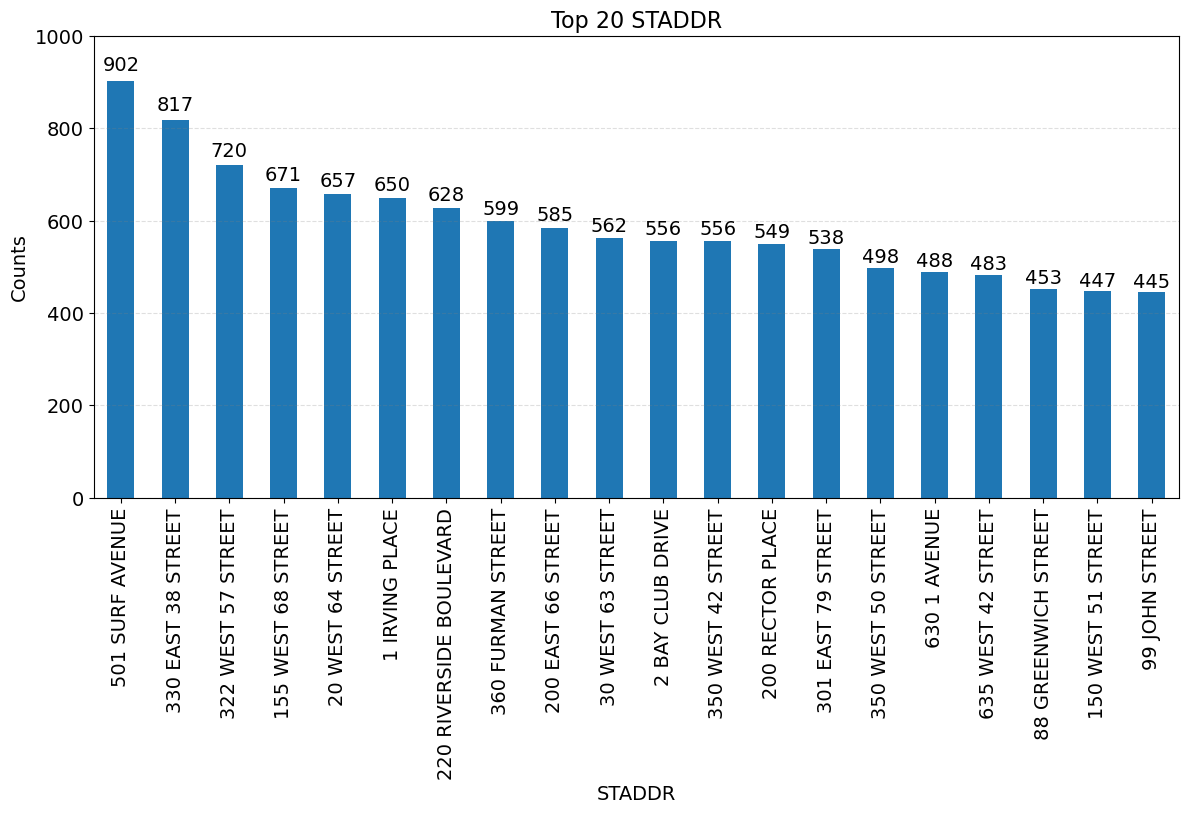

In [213]:
# Generate the bar plot
counts = data['STADDR'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylim(0,1000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.025, str(v), color='black', ha='center', fontsize=14)

# Set titles for the graph and axes
plt.title('Top 20 STADDR', fontsize=16)
plt.xlabel('STADDR', fontsize=14)
plt.ylabel('Counts', rotation=90, fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('STADDR')

## ZIP

In [131]:
len(data['ZIP'].unique())

197

In [132]:
data['ZIP'].count() * 100 / numrecords

97.20913469169761

In [133]:
data['ZIP'].value_counts()

ZIP
10314.00    24606
11234.00    20001
10312.00    18127
10462.00    16905
10306.00    16578
            ...  
11359.00        1
11005.00        1
10162.00        1
11352.00        1
11241.00        1
Name: count, Length: 196, dtype: int64

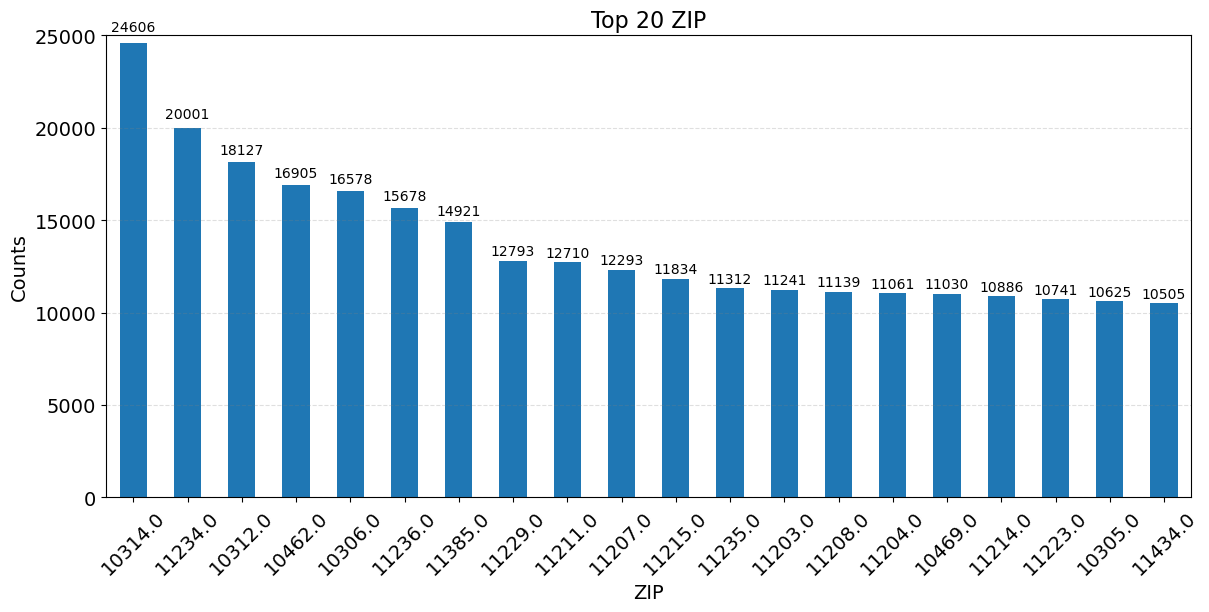

In [217]:
# Generate the bar plot
# fig = plt.figure(figsize=(18, 10))
counts = data['ZIP'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylim(0,25000)

# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.025, str(v), color='black', ha='center', fontsize=10, rotation=0)

# Set titles for the graph and axes
plt.title('Top 20 ZIP', fontsize=16)
plt.xlabel('ZIP', fontsize=14)
plt.ylabel('Counts', rotation=90, fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('ZIP')

## EXMPTCL

In [135]:
len(data['EXMPTCL'].unique())

15

In [136]:
data['EXMPTCL'].count() * 100 / numrecords

1.4546299979271593

In [137]:
data['EXMPTCL'].value_counts()

EXMPTCL
X1    6912
X5    5208
X7     820
X2     770
X6     764
X4     441
X8     292
X3     259
X9     108
VI       1
KI       1
A9       1
R4       1
5        1
Name: count, dtype: int64

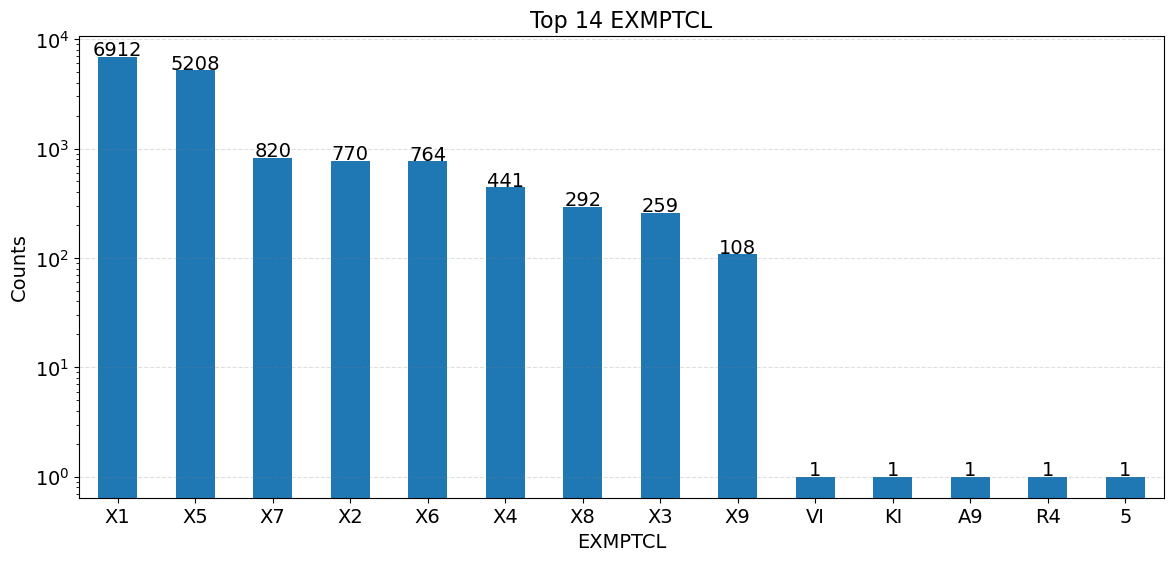

In [220]:
# Generate the bar plot
counts = data['EXMPTCL'].value_counts().head(14)
ax = counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.yscale('log')


# Add number labels to the top of each column
for i, v in enumerate(counts):
    ax.text(i, v*1.025, str(v), color='black', ha='center', fontsize=14)

# Set titles for the graph and axes
plt.title('Top 14 EXMPTCL', fontsize=16)
plt.xlabel('EXMPTCL', fontsize=14)
plt.ylabel('Counts', rotation=90, fontsize=14)
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)

plt.savefig('EXMPTCL')

## BLDFRONT

In [139]:
len(data['BLDFRONT'].unique())

612

In [140]:
data['BLDFRONT'].count() * 100 / numrecords

100.0

In [141]:
data['BLDFRONT'].value_counts()

BLDFRONT
0       228815
20      195101
18       77705
16       74687
25       63684
         ...  
618          1
1169         1
635          1
549          1
1818         1
Name: count, Length: 612, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


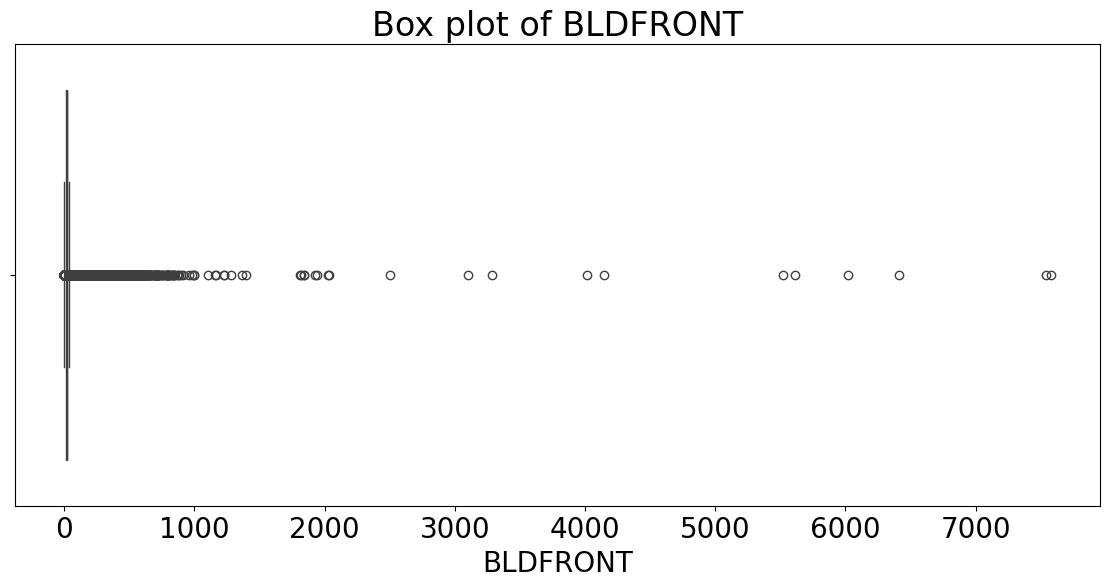

In [142]:
sns.boxplot(x = 'BLDFRONT', data = data)

plt.xlabel('BLDFRONT')
plt.title('Box plot of BLDFRONT')

plt.show()

/tmp/ipykernel_4986/2702424550.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['BLDFRONT'],bins = 100, kde = False)


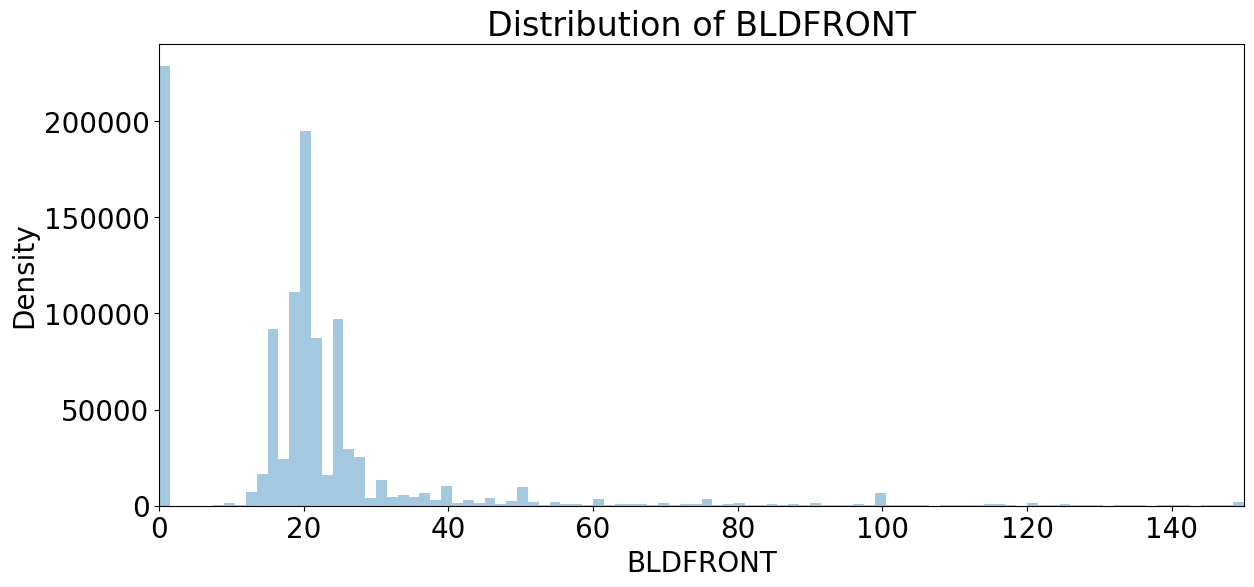

<Figure size 1400x600 with 0 Axes>

In [143]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
sns.distplot(temp['BLDFRONT'],bins = 100, kde = False)

plt.xlabel('BLDFRONT')
plt.ylabel('Density')
plt.title('Distribution of BLDFRONT')
plt.show()
plt.savefig('BLDFRONT')

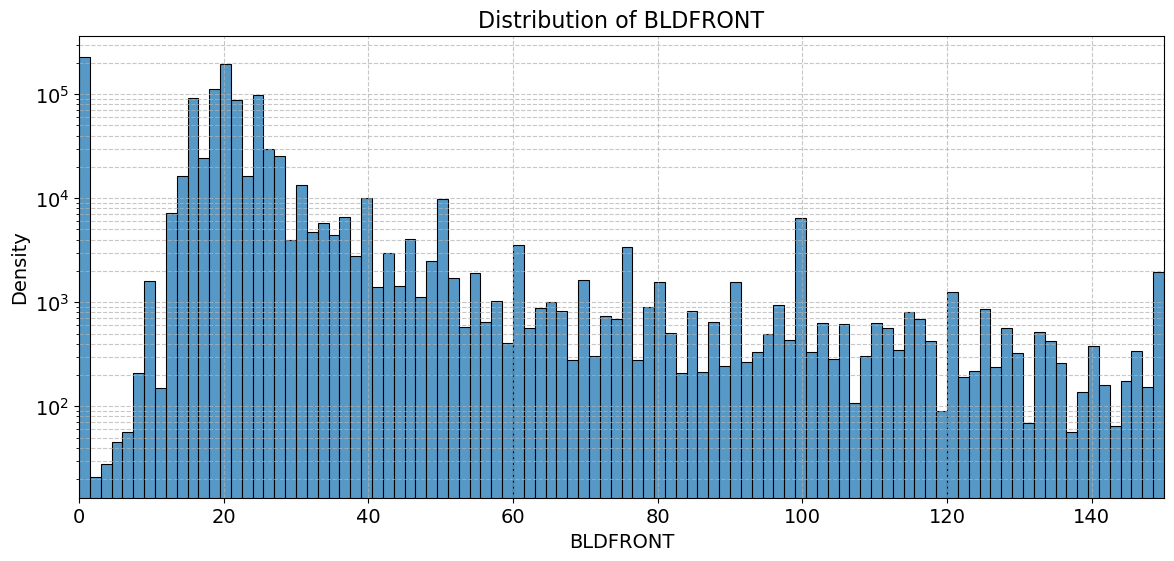

In [222]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
plt.yscale('log')
temp = data[data['BLDFRONT'] <= xhigh]
sns.histplot(temp['BLDFRONT'], bins=100, kde=False,edgecolor='black' )
#sns.distplot(temp['BLDFRONT'],bins = 100, kde = False)

plt.xlabel('BLDFRONT', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of BLDFRONT', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_4986/2141417018.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['BLDFRONT'], bins = 10, kde = False, color = 'dodgerblue')


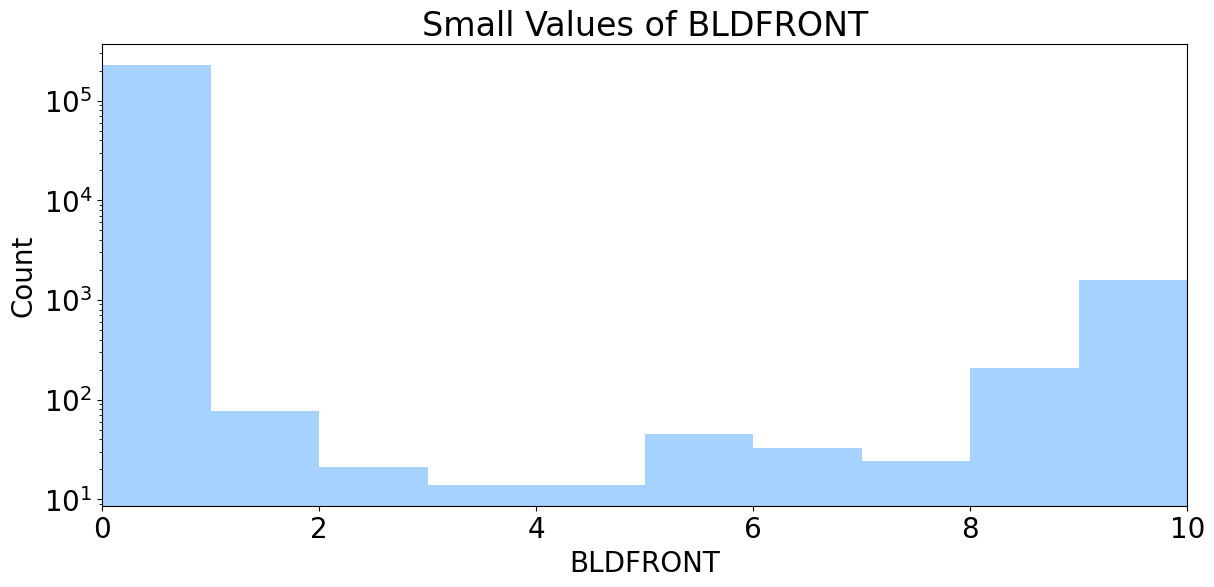

<Figure size 1400x600 with 0 Axes>

In [145]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0, xhigh)
temp = data[data['BLDFRONT'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDFRONT'], bins = 10, kde = False, color = 'dodgerblue')

plt.xlabel('BLDFRONT')
plt.ylabel('Count')
plt.title('Small Values of BLDFRONT')
plt.show()
plt.savefig('BLDFRONT small')

## BLDDEPTH

In [146]:
len(data['BLDDEPTH'].unique())

621

In [147]:
data['BLDDEPTH'].count() * 100 / numrecords

100.0

In [148]:
data['BLDDEPTH'].value_counts()

BLDDEPTH
0       228853
40       48775
50       45358
45       40670
36       40109
         ...  
5000         1
581          1
438          1
475          1
780          1
Name: count, Length: 621, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


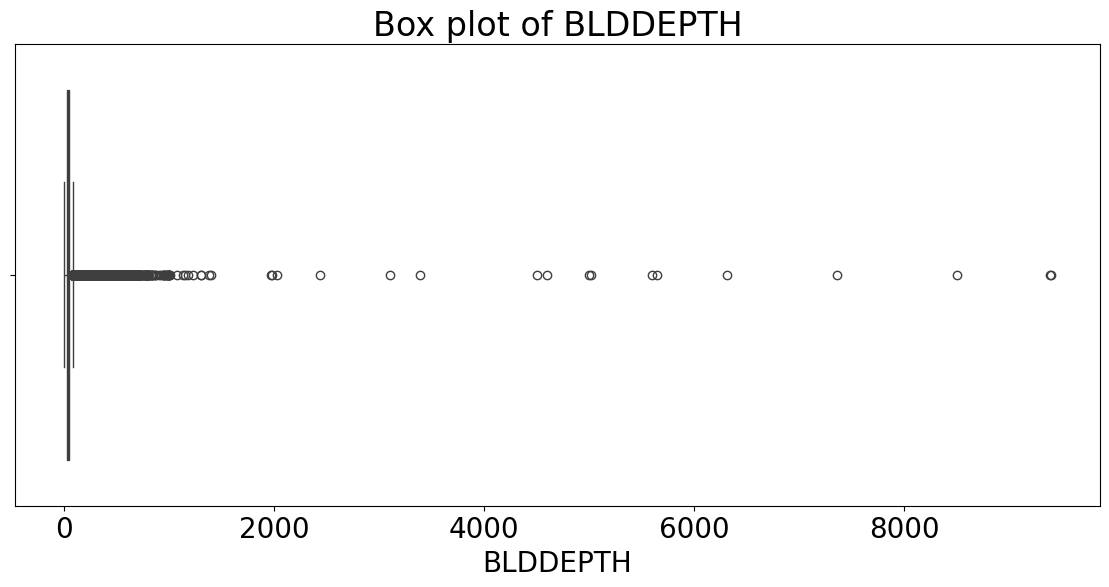

In [149]:
sns.boxplot(x = 'BLDDEPTH', data = data)

plt.xlabel('BLDDEPTH')
plt.title('Box plot of BLDDEPTH')

plt.show()

/tmp/ipykernel_4986/3489067070.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['BLDDEPTH'],bins = 100, kde = False)


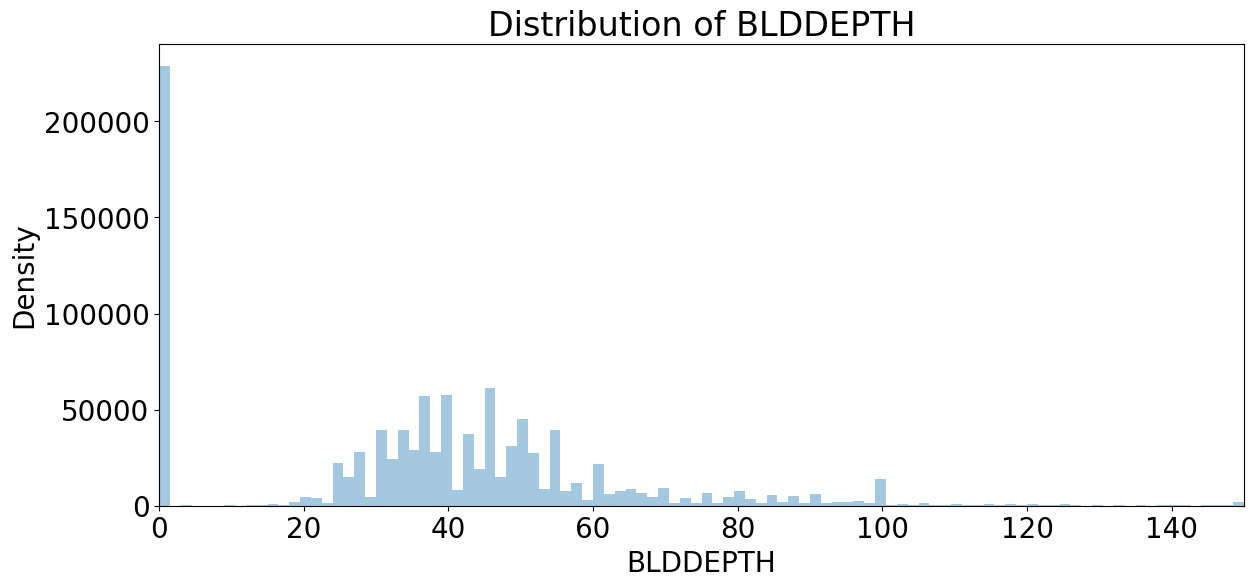

<Figure size 1400x600 with 0 Axes>

In [150]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
sns.distplot(temp['BLDDEPTH'],bins = 100, kde = False)

plt.xlabel('BLDDEPTH')
plt.ylabel('Density')
plt.title('Distribution of BLDDEPTH')
plt.show()
plt.savefig('BLDDEPTH')

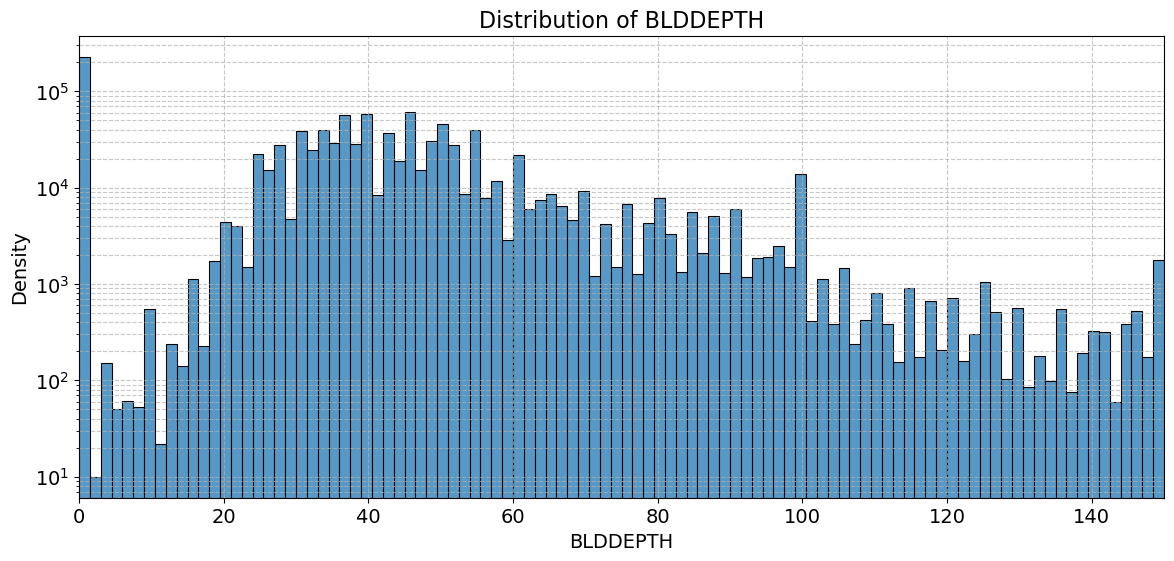

In [223]:
# look at the most relevant range
xhigh = 150
plt.xlim(0, xhigh)
plt.yscale('log')
temp = data[data['BLDDEPTH'] <= xhigh]
#sns.distplot(temp['BLDDEPTH'],bins = 100, kde = False)
sns.histplot(temp['BLDDEPTH'], bins=100, kde=False,edgecolor='black' )  

plt.xlabel('BLDDEPTH', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of BLDDEPTH', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipykernel_4986/1234582967.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp['BLDDEPTH'], bins = 10, kde = False, color = 'dodgerblue')


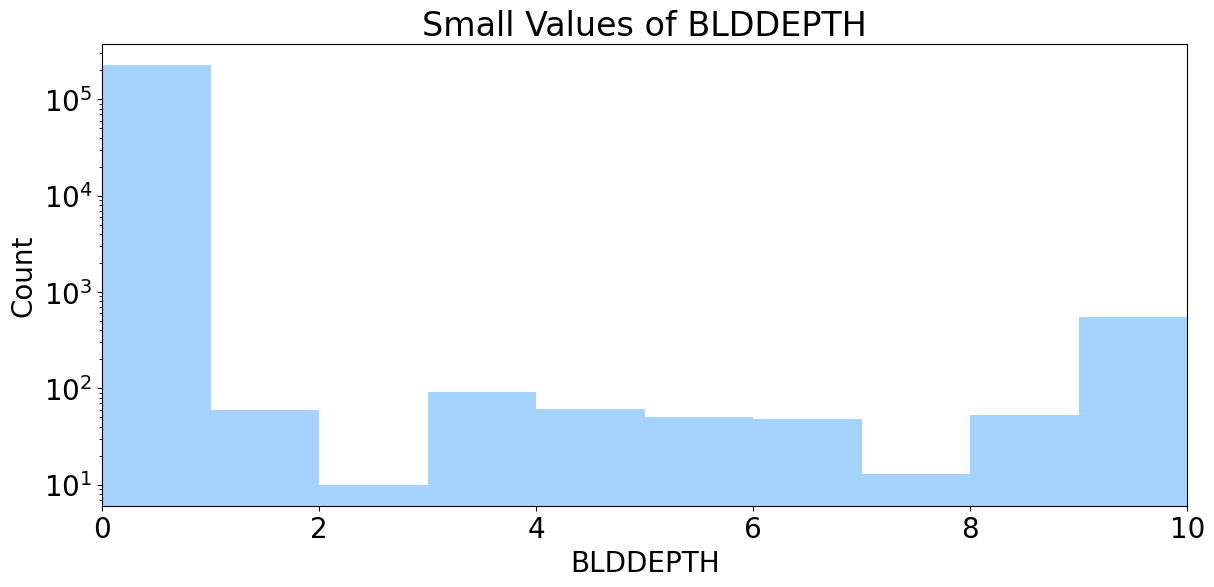

In [152]:
# look at the very small sizes, including zeros
xhigh = 10
plt.xlim(0,xhigh)
temp = data[data['BLDDEPTH'] <= xhigh]
plt.yscale('log')
sns.distplot(temp['BLDDEPTH'], bins = 10, kde = False, color = 'dodgerblue')

plt.xlabel('BLDDEPTH')
plt.ylabel('Count')
plt.title('Small Values of BLDDEPTH')

plt.savefig('BLDDEPTH small')

## AVLAND2

In [153]:
len(data['AVLAND2'].unique())

58592

In [154]:
data['AVLAND2'].count() * 100 / numrecords

26.398467218303743

In [155]:
data['AVLAND2'].value_counts()

AVLAND2
2408.00     767
2233.00     610
45000.00    597
750.00      547
90000.00    511
           ... 
42115.00      1
71261.00      1
47768.00      1
41847.00      1
37857.00      1
Name: count, Length: 58591, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


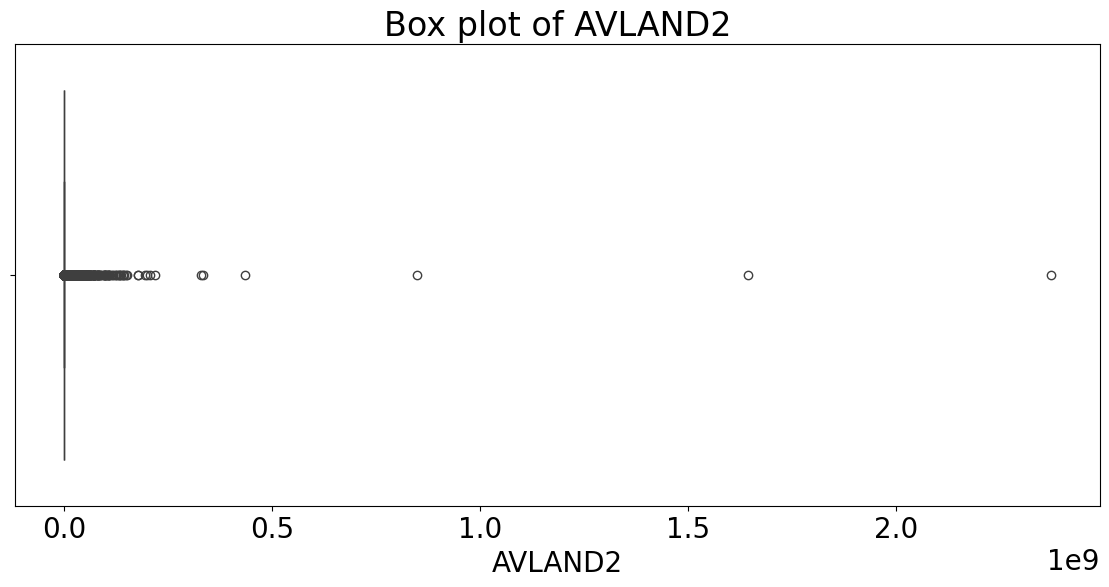

In [156]:
sns.boxplot(x = 'AVLAND2', data = data)

plt.xlabel('AVLAND2')
plt.title('Box plot of AVLAND2')

plt.show()

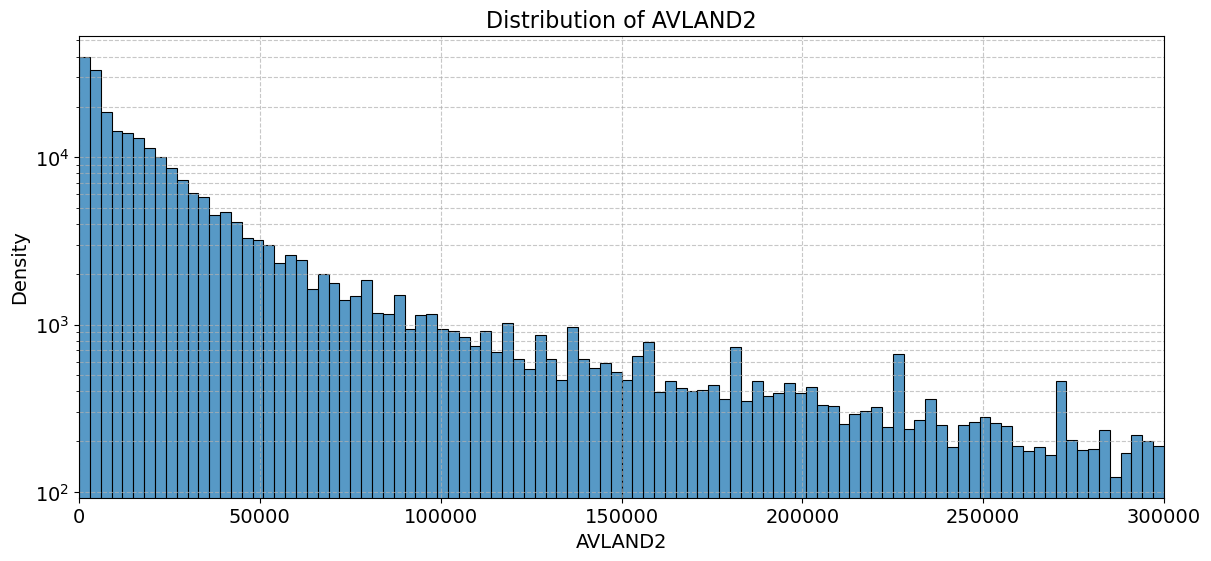

In [224]:
xhigh = 300000
plt.xlim(0,xhigh)
plt.yscale('log')
temp = data[data['AVLAND2'] <= xhigh]
sns.histplot(temp['AVLAND2'], bins=100, kde=False,edgecolor='black' )
#sns.distplot(temp['AVLAND2'],bins = 100, kde = False)

plt.xlabel('AVLAND2', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of AVLAND2', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.savefig('AVLAND2')

plt.show()

## AVTOT2

In [158]:
len(data['AVTOT2'].unique())

111361

In [159]:
data['AVTOT2'].count() * 100 / numrecords

26.399027445531907

In [160]:
data['AVTOT2'].value_counts()

AVTOT2
750.00         656
62.00          383
9468.00        233
9104.00        232
9349.00        225
              ... 
4558800.00       1
439450.00        1
22230000.00      1
2424200.00       1
18360.00         1
Name: count, Length: 111360, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


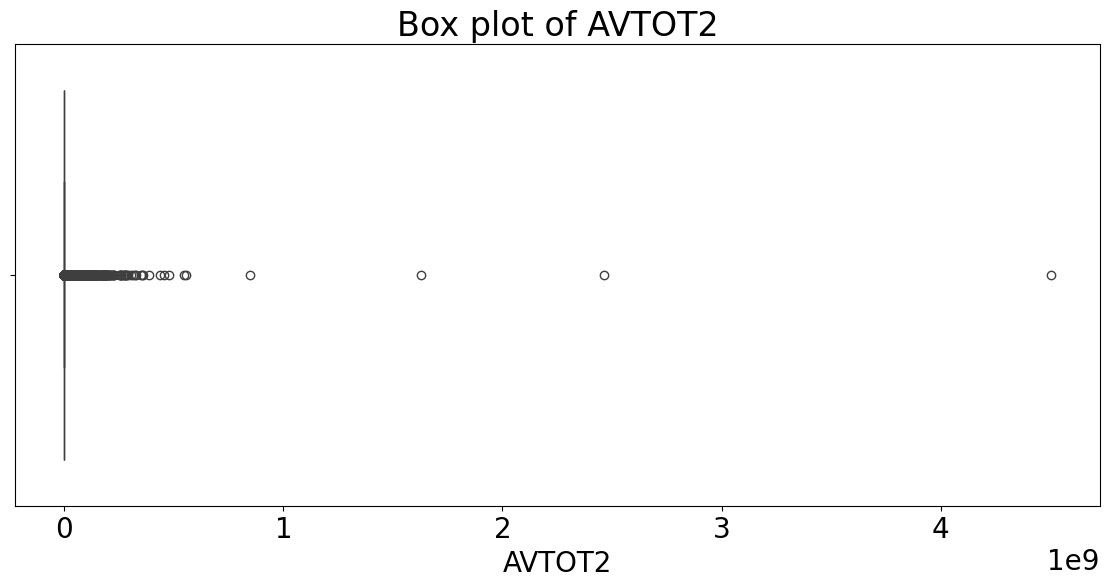

In [161]:
sns.boxplot(x = 'AVTOT2', data = data)

plt.xlabel('AVTOT2')
plt.title('Box plot of AVTOT2')

plt.show()

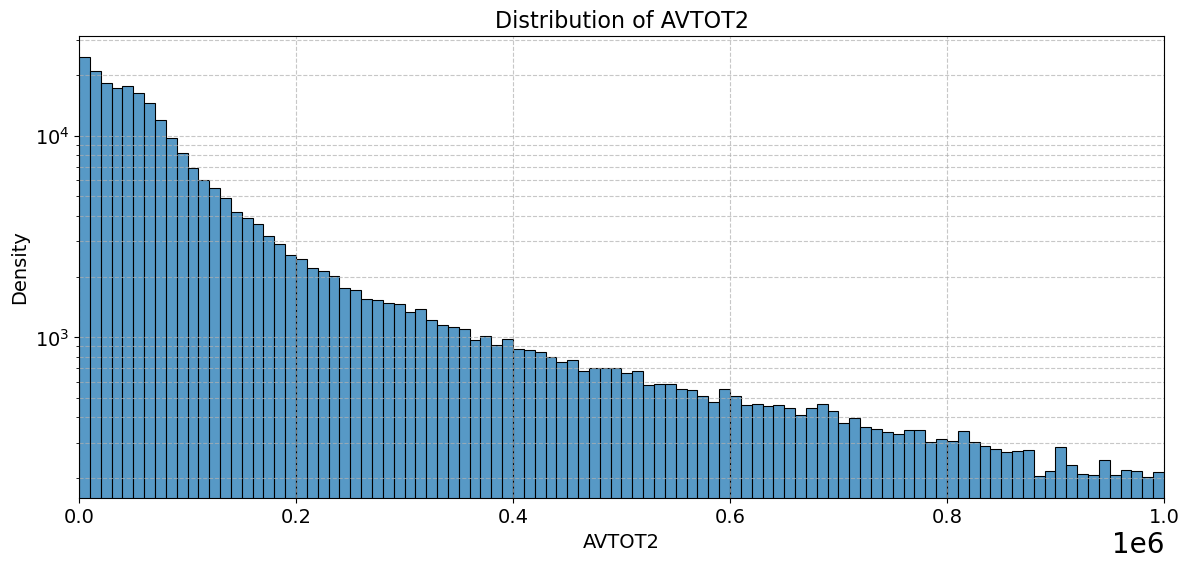

In [225]:
xhigh = 1000000
plt.xlim(0, xhigh)
plt.yscale('log')
temp = data[data['AVTOT2'] <= xhigh]
#sns.distplot(temp['AVTOT2'],bins = 100, kde = False)
sns.histplot(temp['AVTOT2'], bins=100, kde=False,edgecolor='black' )

plt.xlabel('AVTOT2', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of AVTOT2', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.savefig('AVTOT2')
plt.show()

## EXLAND2

In [163]:
len(data['EXLAND2'].unique())

22196

In [164]:
data['EXLAND2'].count() * 100 / numrecords

8.165218479281863

In [165]:
data['EXLAND2'].value_counts()

EXLAND2
2090.00     26393
4180.00       734
2650.00       393
62.00         387
62640.00      193
            ...  
22717.00        1
14833.00        1
16349.00        1
35819.00        1
37857.00        1
Name: count, Length: 22195, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


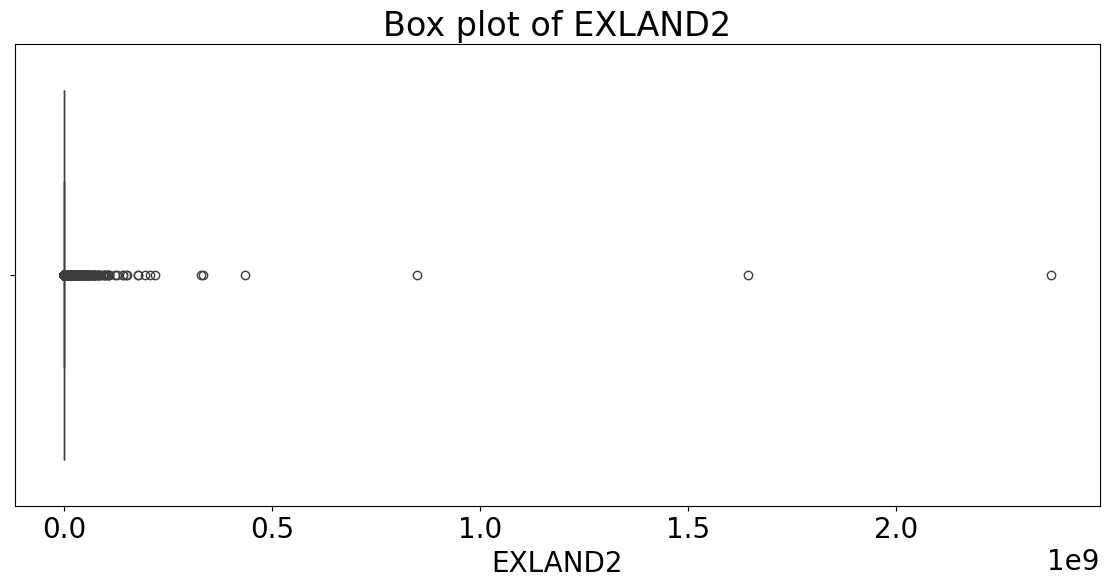

In [166]:
sns.boxplot(x = 'EXLAND2', data = data)

plt.xlabel('EXLAND2')
plt.title('Box plot of EXLAND2')

plt.show()

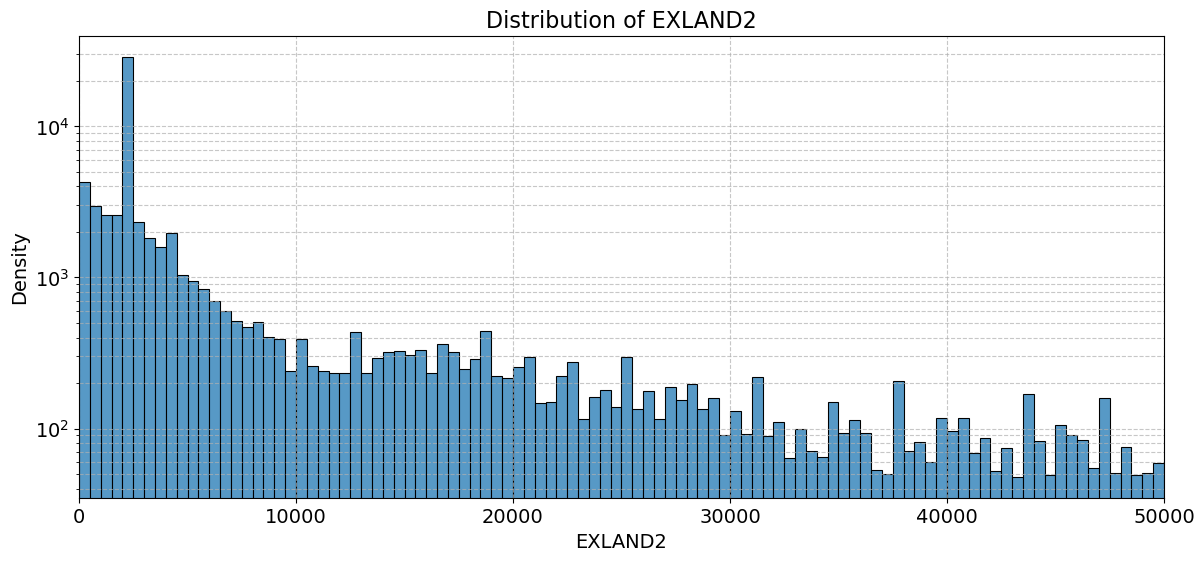

In [227]:
xhigh = 50000
plt.xlim(0, xhigh)
temp = data[data['EXLAND2'] <= xhigh]
#sns.distplot(temp['EXLAND2'],bins = 100, kde = False)
sns.histplot(temp['EXLAND2'], bins=100, kde=False,edgecolor='black' )
plt.yscale('log')

plt.xlabel('EXLAND2', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of EXLAND2', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.savefig('EXLAND2')

plt.show()

## EXTOT2

In [168]:
len(data['EXTOT2'].unique())

48349

In [169]:
data['EXTOT2'].count() * 100 / numrecords

12.215567967701032

In [170]:
data['EXTOT2'].value_counts()

EXTOT2
2090.00       24739
4180.00         911
2650.00         438
62.00           382
2850.00         375
              ...  
95737.00          1
1809630.00        1
776350.00         1
276102.00         1
394146.00         1
Name: count, Length: 48348, dtype: int64

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


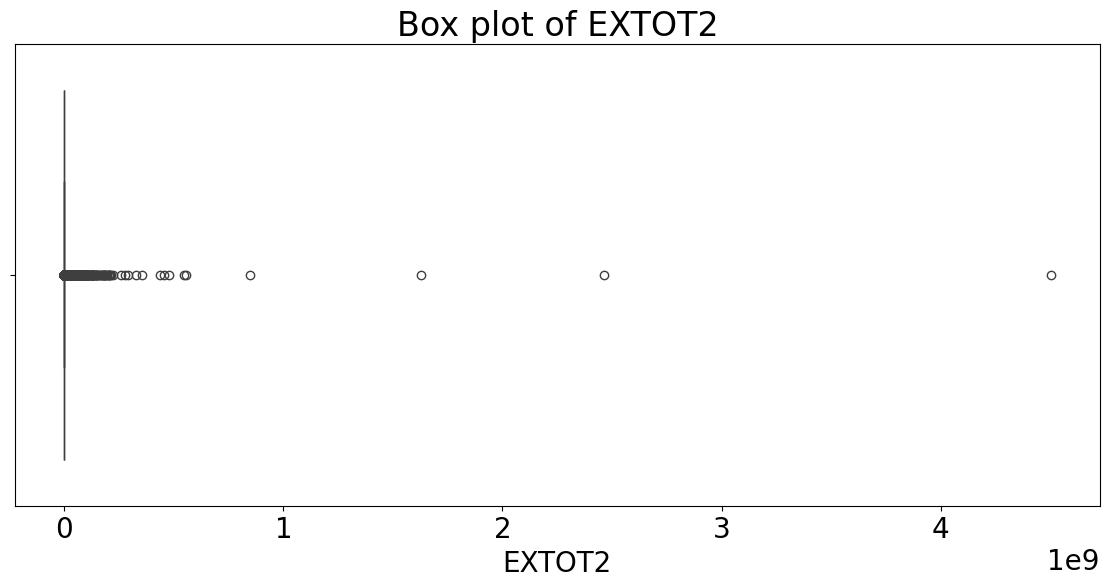

In [171]:
sns.boxplot(x = 'EXTOT2', data = data)

plt.xlabel('EXTOT2')
plt.title('Box plot of EXTOT2')

plt.show()

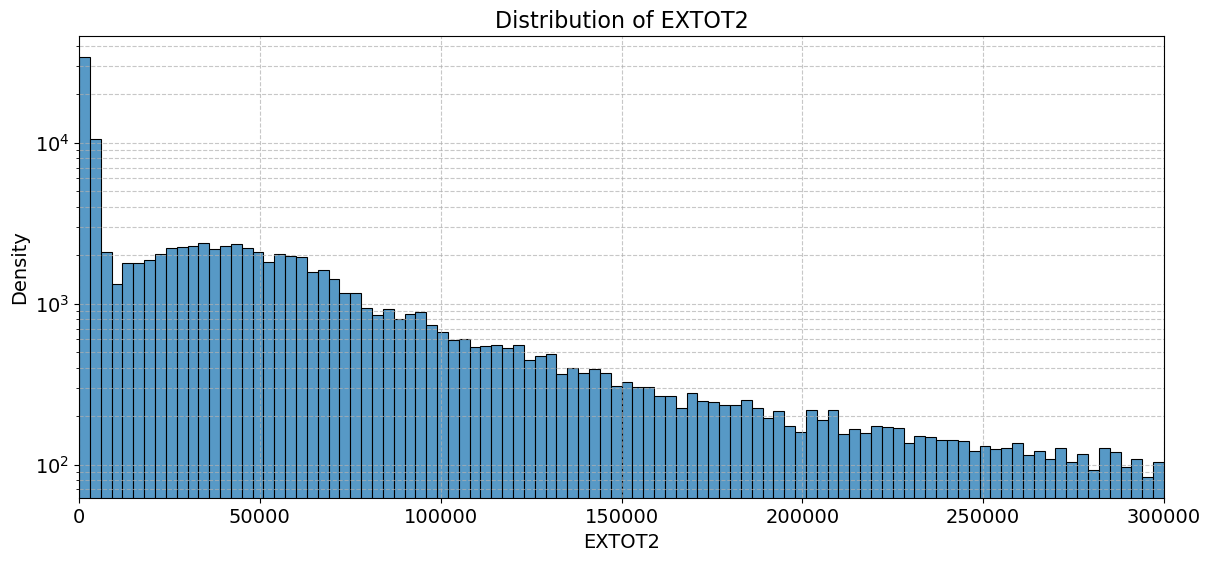

In [228]:
xhigh = 300000
plt.xlim(0, xhigh)
temp = data[data['EXTOT2'] <= xhigh]
#sns.distplot(temp['EXTOT2'],bins = 100, kde = False)
sns.histplot(temp['EXTOT2'], bins=100, kde=False,edgecolor='black' )
plt.yscale('log')

plt.xlabel('EXTOT2', fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.title('Distribution of EXTOT2', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.savefig('EXTOT2')
plt.show()

## EXCD2

In [173]:
len(data['EXCD2'].unique())

61

In [174]:
data['EXCD2'].count() * 100 / numrecords

8.678666733893934

In [175]:
data['EXCD2'].value_counts()

EXCD2
1017.00    65777
1015.00    12337
5112.00     6867
1019.00     3178
1920.00     2961
1200.00      881
1101.00      494
5129.00      227
1986.00       35
1022.00       31
1985.00       21
1604.00       13
5109.00       11
1021.00        8
7160.00        7
1523.00        7
2280.00        7
5111.00        6
5114.00        6
2310.00        6
5113.00        6
2152.00        4
5110.00        3
1501.00        3
1023.00        3
5130.00        3
3390.00        3
1504.00        3
1605.00        2
2500.00        2
1602.00        2
1404.00        2
1603.00        2
1521.00        2
5104.00        2
1850.00        2
2232.00        1
2350.00        1
1011.00        1
2134.00        1
4500.00        1
1402.00        1
2262.00        1
5101.00        1
1930.00        1
3410.00        1
1891.00        1
1102.00        1
2202.00        1
2201.00        1
1522.00        1
2231.00        1
2132.00        1
2151.00        1
5116.00        1
6800.00        1
1505.00        1
1401.00        1
5108.00 

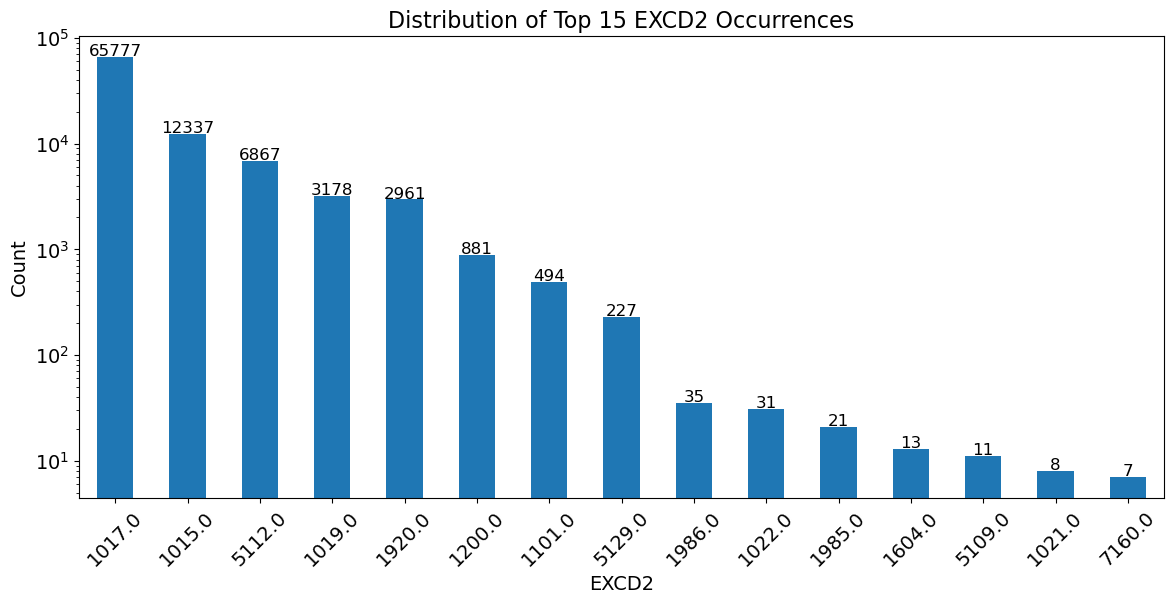

In [231]:
data['EXCD2'].value_counts().head(15).plot(kind = 'bar')
# plt.xticks(rotation = 0)
plt.yscale('log')

plt.xlabel('EXCD2', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Distribution of Top 15 EXCD2 Occurrences', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.yticks(fontsize = 14)

# Add number labels to the top of each column
for i, v in enumerate(data['EXCD2'].value_counts().head(15)):
    plt.text(i, v*1.025, str(v), color='black', ha='center', fontsize=12)

plt.savefig('plot')

/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


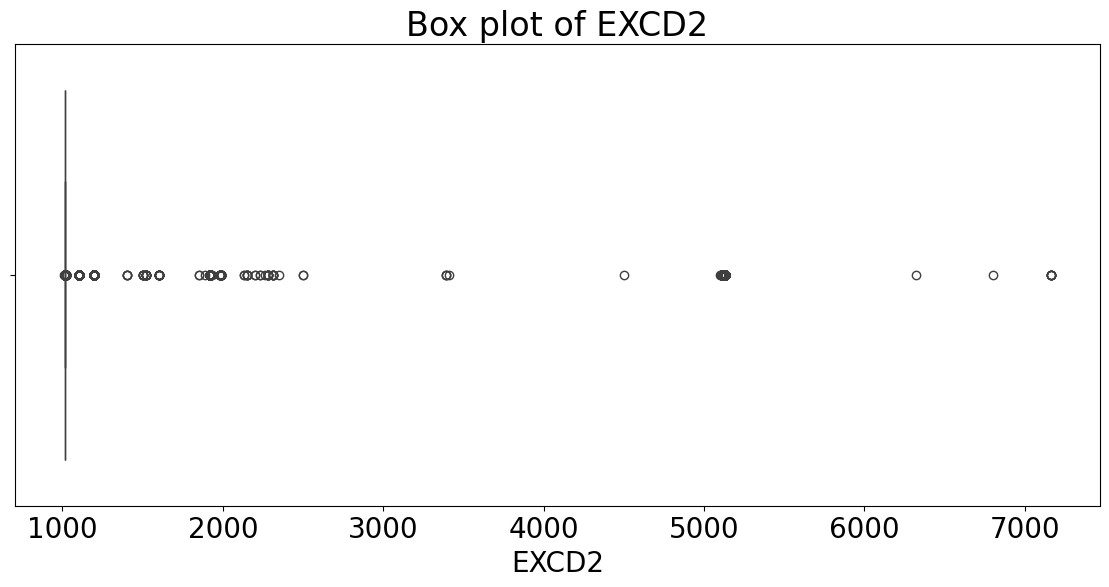

In [177]:
sns.boxplot(x = 'EXCD2', data = data)

plt.xlabel('EXCD2')
plt.title('Box plot of EXCD2')

plt.show()

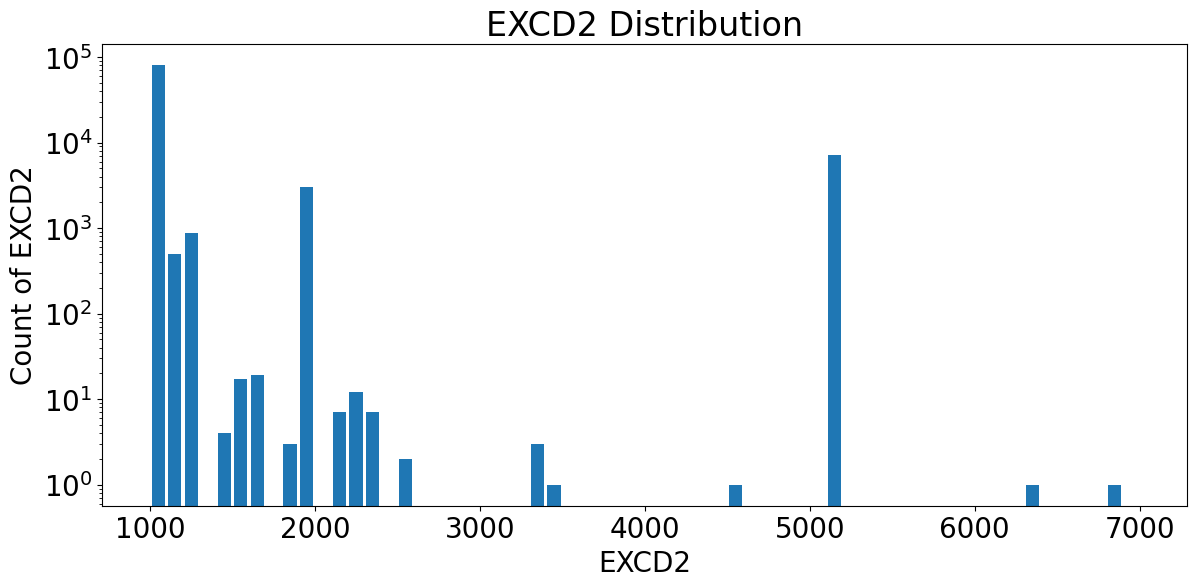

In [178]:
# plotting a histogram
range = (1000, 7000)
bins = 60

plt.hist(data['EXCD2'], bins, range, histtype = 'bar', rwidth = 0.8)

plt.yscale('log')
plt.xlabel('EXCD2')
plt.ylabel('Count of EXCD2')
plt.title('EXCD2 Distribution')
plt.savefig('EXCD2')

plt.savefig('plot')


## PERIOD

In [179]:
len(data['PERIOD'].unique())

1

In [180]:
data['PERIOD'].count() * 100 / numrecords

100.0

In [181]:
data['PERIOD'].value_counts()

PERIOD
FINAL    1070994
Name: count, dtype: int64

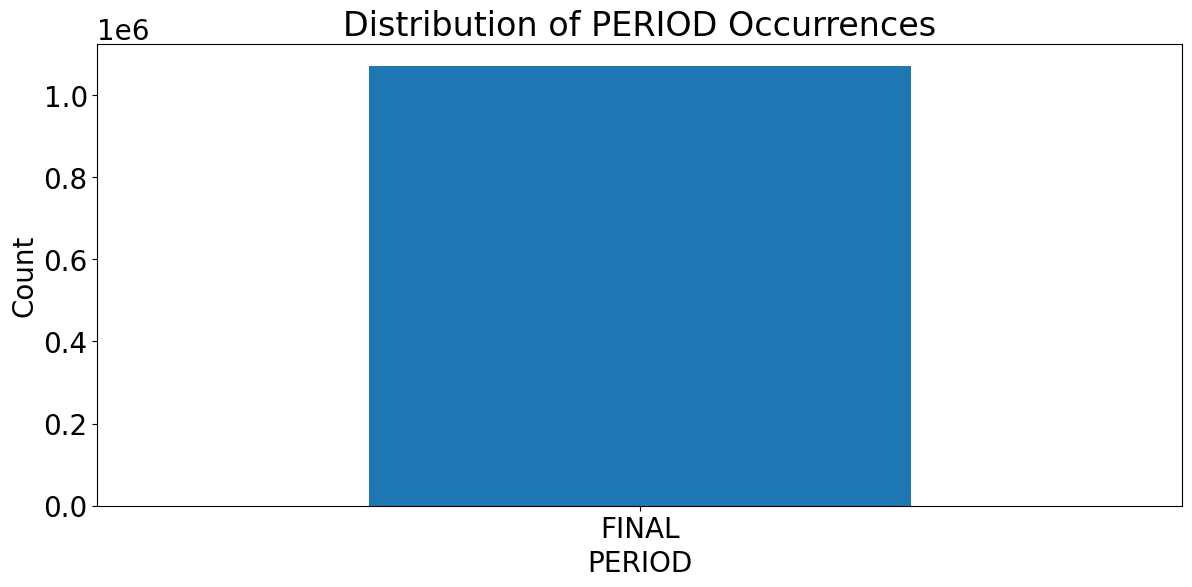

In [182]:
data['PERIOD'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
# plt.yscale('log')

plt.xlabel('PERIOD')
plt.ylabel('Count')
plt.title('Distribution of PERIOD Occurrences')

plt.savefig('plot')

## YEAR

In [183]:
len(data['YEAR'].unique())

1

In [184]:
data['YEAR'].count() * 100 / numrecords

100.0

In [185]:
data['YEAR'].value_counts()

YEAR
2010/11    1070994
Name: count, dtype: int64

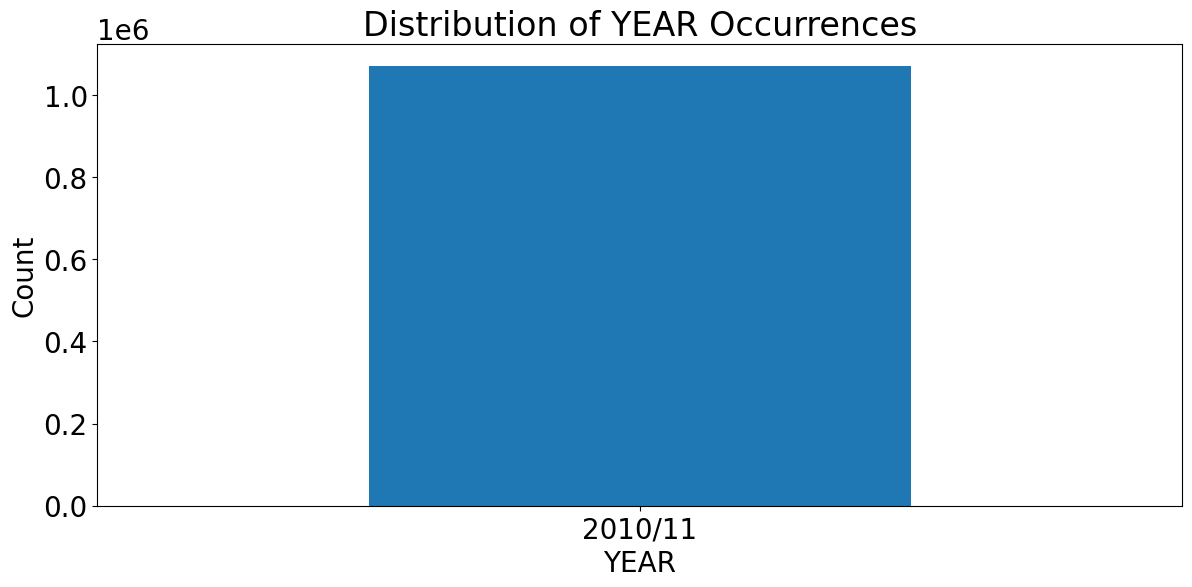

In [186]:
data['YEAR'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
# plt.yscale('log')

plt.xlabel('YEAR')
plt.ylabel('Count')
plt.title('Distribution of YEAR Occurrences')

plt.savefig('plot')

## VALTYPE

In [187]:
len(data['VALTYPE'].unique())

1

In [188]:
data['VALTYPE'].count() * 100 / numrecords

100.0

In [189]:
data['VALTYPE'].value_counts()

VALTYPE
AC-TR    1070994
Name: count, dtype: int64

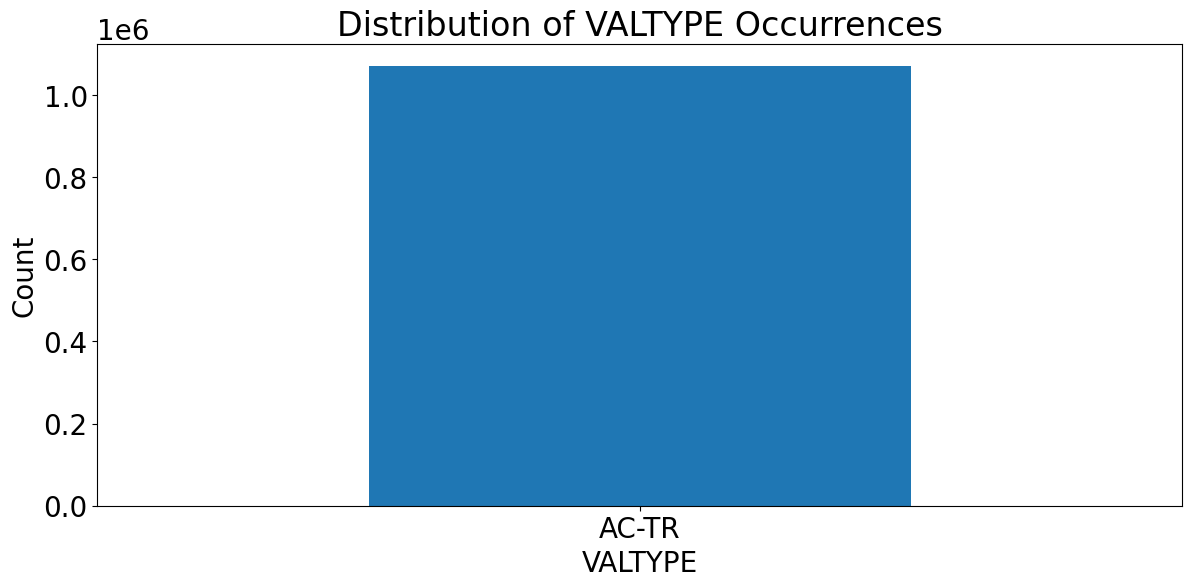

In [190]:
data['VALTYPE'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
# plt.yscale('log')

plt.xlabel('VALTYPE')
plt.ylabel('Count')
plt.title('Distribution of VALTYPE Occurrences')

plt.savefig('plot')

In [191]:
print('duration: ', dt.datetime.now() - start_time)

duration:  0:04:47.606713
